<center><img src="https://jordiroigde-steam-explorer-steam-explorer-ubez7e.streamlit.app/~/+/media/cd668f2cdaf166ce4c2915a97485f03a8db23e445d285109ebc37295.png" alt="Descripción de la imagen"></center>


<center><img src="https://jordiroigde-steam-explorer-steam-explorer-ubez7e.streamlit.app/~/+/media/c5f2aa5de00e5091a17b1a68c9539a37fcffba123a5d6df62163a184.jpg" alt="Descripción de la imagen"></center>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse
import pickle
import matplotlib.animation as animation

In [2]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

# TOP 10 países que mayor dinero generan al sector del videojuego
China – 27.547.039.000 millones de dólares
Estados Unidos – 25.059.883.000 millones de dólares
Japón – 12.545.659.000 millones de dólares
Alemania – 4.378.066.000 millones de dólares
Reino Unido – 4.217.715.000 millones de dólares
Corea – 4.187.711.000 millones de dólares
Francia – 2.967.052.000 millones de dólares
Canadá – 1.947.371.000 millones de dólares
España – 1.913.050.000 millones de dólares
Italia – 1.874.608.000 millones de dólares

In [3]:
os.chdir(r"C:\Users\jroig\Documents\VSCode\samplerepo\Proyecto_definitivo\data")

In [4]:
accion = pd.read_csv("accion.csv")
aventura = pd.read_csv("aventura.csv")
deportes = pd.read_csv("deportes.csv")
early = pd.read_csv("earlyacces.csv")
estrategia = pd.read_csv("estrategia.csv")
free = pd.read_csv("free.csv")
mmorpg = pd.read_csv("mmorpg.csv")
rpg = pd.read_csv("rpg.csv")
simulacion = pd.read_csv("simulacion.csv")
indie = pd.read_csv("indie.csv")

In [5]:
# patata = dfjunto["Publisher(s)"].value_counts()

In [6]:
accion = accion.drop("#", axis=1)
aventura = aventura.drop("#", axis=1)
deportes = deportes.drop("#", axis=1)
early = early.drop("#", axis=1)
estrategia = estrategia.drop("#", axis=1)
free = free.drop("#", axis=1)
mmorpg = mmorpg.drop("#", axis=1)
rpg = rpg.drop("#", axis=1)
simulacion = simulacion.drop("#", axis=1)
indie = indie.drop("#", axis=1)

In [7]:
# Vamos a hacer una lista de todos los DF's, si no tengo que hacer demasiadas lineas.
dataframes = [accion, aventura, deportes, early, estrategia, free, mmorpg, rpg, simulacion, indie]

# Iterar sobre cada dataframe y aplicar la transformación de la columna para convertirla a datatime, y dejar los errores a NaT
for df in dataframes:
    df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

In [8]:
#Solo los que no són datatime.
# accion[accion['Release date'].apply(lambda x: type(x) != pd.Timestamp)]

In [9]:
accion["Score rank(Userscore / Metascore)"]

0        N/A (N/A/90%)
1        N/A (N/A/96%)
2        N/A (N/A/92%)
3        N/A (N/A/88%)
4        N/A (N/A/83%)
             ...      
27985        N/A (N/A)
27986        N/A (N/A)
27987        N/A (N/A)
27988        N/A (N/A)
27989        N/A (N/A)
Name: Score rank(Userscore / Metascore), Length: 27990, dtype: object

In [10]:
#Hay pocos valores útiles a Score rank, vamos a guardar en una variable los que son útiles por si acaso, y dropearemos la columna. Creamos la función
def filter_dataframe(df):
    df_filter = df[df["Score rank(Userscore / Metascore)"] != "N/A (N/A)"]
    return df_filter

In [11]:
#Aplicamos la función a cada df y les asignamos una variable, porque los vamos a dropear.
accionrank = filter_dataframe(accion)
aventurarank = filter_dataframe(aventura)
deportesrank = filter_dataframe(deportes)
earlyrank = filter_dataframe(early)
estrategiarank = filter_dataframe(estrategia)
freerank = filter_dataframe(free)
mmorpgrank = filter_dataframe(mmorpg)
rpgrank = filter_dataframe(rpg)
simulacionrank = filter_dataframe(simulacion)
indierank = filter_dataframe(indie)

In [12]:
#Ahora ya podemos eliminar la columna con un bucle, para todos los df, ya que los hemos puesto en una lista:
for df in dataframes:
    df.drop("Score rank(Userscore / Metascore)", axis=1, inplace=True)

In [13]:
def filter2_dataframe(df):
    df_filter2 = df[df["Playtime (Median)"] != "00:00 (00:00)"]
    return df_filter2

In [14]:
#Aplicamos la función a cada df y les asignamos una variable, porque los vamos a dropear.
accionplaytime = filter2_dataframe(accion)
aventuraplaytime = filter2_dataframe(aventura)
deportesplaytime = filter2_dataframe(deportes)
earlyplaytime = filter2_dataframe(early)
estrategiaplaytime = filter2_dataframe(estrategia)
freeplaytime = filter2_dataframe(free)
mmorpgplaytime = filter2_dataframe(mmorpg)
rpgplaytime = filter2_dataframe(rpg)
simulacionplaytime = filter2_dataframe(simulacion)
indieplaytime = filter2_dataframe(indie)

In [15]:
#Ahora ya podemos eliminar la columna con un bucle, para todos los df, ya que los hemos puesto en una lista:
for df in dataframes:
    df.drop("Playtime (Median)", axis=1, inplace=True)

In [16]:
#En las columnas Price, queremos quitar el valor $ para pasarlo a float, y los "Free" los pasaremos a 0,0. Así podremos hacer gráficos guays.
#Vamos a crear un bucle para todos los dfs:
for df in dataframes:
    # Reemplazar los valores de "Free" en la columna "Price" por "0.0"
    df['Price'].replace('Free', '0.0', inplace=True)
    
    # Eliminar el símbolo "$" de los valores de la columna "Price"
    df['Price'] = df['Price'].str.replace('$', '')
    
    # Convertir la columna "Price" al tipo de datos float
    df['Price'] = df['Price'].astype(float)


C:\Users\jroig\AppData\Local\Temp\ipykernel_23036\1874858370.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [17]:
#Vale, vamos a crear dos funciones que nos den los Owners minimos y máximos, en columnas distintas para graficarlos
def obtener_minimo_rango(valor_cadena):
    valor_numerico = valor_cadena.replace(',', '').replace('\xa0', '').replace('..', '-')
    minimo, maximo = valor_numerico.split('-')
    return int(minimo)

def obtener_maximo_rango(valor_cadena):
    valor_numerico = valor_cadena.replace(',', '').replace('\xa0', '').replace('..', '-')
    minimo, maximo = valor_numerico.split('-')
    return int(maximo)

In [18]:
for df in dataframes:
    df['Owners_min'] = df['Owners'].apply(obtener_minimo_rango)
    df['Owners_max'] = df['Owners'].apply(obtener_maximo_rango)
    df["Owners_min_text"] = df["Owners_min"].apply(lambda x: f"{x/1000000:.1f}M" if x >= 1000000 else (f"{x/1000:.1f}K" if x >= 1000 else f"{x}"))
    df["Owners_max_text"] = df["Owners_max"].apply(lambda x: f"{x/1000000:.1f}M" if x >= 1000000 else (f"{x/1000:.1f}K" if x >= 1000 else f"{x}"))
    df['Owners_min'] = df['Owners_min'].apply(lambda x: '{:.2E}'.format(x))
    df['Owners_max'] = df['Owners_max'].apply(lambda x: '{:.2E}'.format(x))


In [19]:
free = free.loc[free['Price'] == 0.00]

In [20]:
accion

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,5.00E+08,200.0M,500.0M
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,1.00E+08,50.0M,100.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,1.00E+08,50.0M,100.0M
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,1.00E+08,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,1.00E+08,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
27985,Rushing Beat Of Rage,2021-01-05,8.99,"0 .. 20,000",Joystick Studio,Joystick Studio,0.00E+00,2.00E+04,0,20.0K
27986,Welcome To... Chichester 2 - Part II : No Extr...,2021-09-30,9.99,"0 .. 20,000",Triority Interactive Novels,Triority Interactive Novels,0.00E+00,2.00E+04,0,20.0K
27987,Nova Odessa - The Strange Tower,2021-02-27,0.74,"0 .. 20,000",Leonardo Alexandrino,Leonardo Alexandrino,0.00E+00,2.00E+04,0,20.0K
27988,The Trivial Dead,2021-03-16,2.99,"0 .. 20,000",Big Red Eight,Big Red Eight,0.00E+00,2.00E+04,0,20.0K


In [21]:
aventura

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,1.00E+08,50.0M,100.0M
1,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,1.00E+08,50.0M,100.0M
2,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",Amazon Games,Amazon Games,5.00E+07,1.00E+08,50.0M,100.0M
3,Lost Ark,2022-02-11,0.00,"50,000,000 .. 100,000,000",Smilegate RPG,Amazon Games,5.00E+07,1.00E+08,50.0M,100.0M
4,PUBG: BATTLEGROUNDS,2017-12-21,0.00,"50,000,000 .. 100,000,000","KRAFTON, Inc.","KRAFTON, Inc.",5.00E+07,1.00E+08,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
25767,Everything Is For Humanity,2022-06-24,12.99,"0 .. 20,000",Vanquisher Games,Vanquisher Games,0.00E+00,2.00E+04,0,20.0K
25768,Ring the City,2019-06-30,9.99,"0 .. 20,000",Giant Games,Giant Games,0.00E+00,2.00E+04,0,20.0K
25769,Deadly Flare,2022-03-11,13.99,"0 .. 20,000",Green Grass Games,Green Grass Games,0.00E+00,2.00E+04,0,20.0K
25770,瞳：祈愿 VR / Pupil: Wandering VR,2019-05-07,11.99,"0 .. 20,000",Spoon Network,Spoon Network,0.00E+00,2.00E+04,0,20.0K


In [22]:
deportes

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Fall Guys: Ultimate Knockout,2020-08-03,NaN,"20,000,000 .. 50,000,000",Mediatonic,SmashGames,2.00E+07,5.00E+07,20.0M,50.0M
1,Rocket League,2015-07-07,NaN,"10,000,000 .. 20,000,000",Psyonix LLC,Psyonix LLC,1.00E+07,2.00E+07,10.0M,20.0M
2,VRChat,2017-02-01,0.00,"10,000,000 .. 20,000,000",VRChat Inc.,VRChat Inc.,1.00E+07,2.00E+07,10.0M,20.0M
3,Street Warriors Online,2016-12-16,1.99,"10,000,000 .. 20,000,000",Crazy Rocks Studios,Crazy Rocks Studios,1.00E+07,2.00E+07,10.0M,20.0M
4,Football Manager 2020,2019-11-19,NaN,"5,000,000 .. 10,000,000",Sports Interactive,SEGA,5.00E+06,1.00E+07,5.0M,10.0M
...,...,...,...,...,...,...,...,...,...,...
3181,DEPLOYMENT,2018-04-10,0.99,"0 .. 20,000",Whale Rock Games,Whale Rock Games,0.00E+00,2.00E+04,0,20.0K
3182,Don Bradman Cricket 14,2014-06-25,19.99,"0 .. 20,000",Big Ant Studios,Big Ant Studios,0.00E+00,2.00E+04,0,20.0K
3183,Legend Bowl,2021-09-02,24.99,"0 .. 20,000",Super Pixel Games,Super Pixel Games,0.00E+00,2.00E+04,0,20.0K
3184,Aokana - Four Rhythms Across the Blue - EXTRA2,2022-12-16,24.99,"0 .. 20,000","sprite, NekoNyan Ltd.","NekoNyan Ltd., HIKARI FIELD",0.00E+00,2.00E+04,0,20.0K


In [23]:
early

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Valheim,2021-02-02,19.99,"20,000,000 .. 50,000,000",Iron Gate AB,Coffee Stain Publishing,2.00E+07,5.00E+07,20.0M,50.0M
1,VRChat,2017-02-01,0.00,"10,000,000 .. 20,000,000",VRChat Inc.,VRChat Inc.,1.00E+07,2.00E+07,10.0M,20.0M
2,鬼谷八荒 Tale of Immortal,2021-01-27,19.99,"10,000,000 .. 20,000,000",鬼谷工作室,"鬼谷工作室, Lightning Games",1.00E+07,2.00E+07,10.0M,20.0M
3,7 Days to Die,2013-12-13,24.99,"10,000,000 .. 20,000,000",The Fun Pimps,The Fun Pimps Entertainment LLC,1.00E+07,2.00E+07,10.0M,20.0M
4,Phasmophobia,2020-09-18,13.99,"10,000,000 .. 20,000,000",Kinetic Games,Kinetic Games,1.00E+07,2.00E+07,10.0M,20.0M
...,...,...,...,...,...,...,...,...,...,...
7365,The Backrooms: Survival,2022-03-31,6.99,"0 .. 20,000",RE:CODE,RE:CODE,0.00E+00,2.00E+04,0,20.0K
7366,Land of the Vikings,2022-11-08,19.99,"0 .. 20,000",Laps Games,Iceberg Interactive,0.00E+00,2.00E+04,0,20.0K
7367,Landlord's Super,2020-04-30,19.99,"0 .. 20,000",Minskworks,Yogscast Games,0.00E+00,2.00E+04,0,20.0K
7368,Wayward,2016-04-22,7.99,"0 .. 20,000",Unlok,Unlok,0.00E+00,2.00E+04,0,20.0K


In [24]:
estrategia

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,5.00E+08,200.0M,500.0M
1,Sid Meier's Civilization V,2010-09-21,29.99,"10,000,000 .. 20,000,000","Firaxis Games, Aspyr (Mac), Aspyr (Linux)","2K, Aspyr (Mac), Aspyr (Linux)",1.00E+07,2.00E+07,10.0M,20.0M
2,Paladins,2018-05-08,0.00,"10,000,000 .. 20,000,000",Evil Mojo Games,Hi-Rez Studios,1.00E+07,2.00E+07,10.0M,20.0M
3,Don't Starve Together,2016-04-21,14.99,"10,000,000 .. 20,000,000",Klei Entertainment,Klei Entertainment,1.00E+07,2.00E+07,10.0M,20.0M
4,Mount & Blade II: Bannerlord,2022-10-25,49.99,"10,000,000 .. 20,000,000",TaleWorlds Entertainment,TaleWorlds Entertainment,1.00E+07,2.00E+07,10.0M,20.0M
...,...,...,...,...,...,...,...,...,...,...
12829,Othello：Daynight Time Clash,2022-06-13,1.99,"0 .. 20,000",King Moon,King Moon,0.00E+00,2.00E+04,0,20.0K
12830,Barbaria,2023-02-09,19.99,"0 .. 20,000","Stalwart Games, LLC","Stalwart Games, LLC",0.00E+00,2.00E+04,0,20.0K
12831,Eye in the Sky,2017-12-05,9.99,"0 .. 20,000",VinLia Games,VinLia Games,0.00E+00,2.00E+04,0,20.0K
12832,Kombine,2016-10-14,0.99,"0 .. 20,000",Robert Alvarez,Robert Alvarez,0.00E+00,2.00E+04,0,20.0K


In [25]:
free

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.0,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,5.00E+08,200.0M,500.0M
1,Team Fortress 2,2007-10-10,0.0,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,1.00E+08,50.0M,100.0M
2,Apex Legends,2020-11-04,0.0,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,1.00E+08,50.0M,100.0M
3,Counter-Strike: Global Offensive,2012-08-21,0.0,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,1.00E+08,50.0M,100.0M
4,PUBG: BATTLEGROUNDS,2017-12-21,0.0,"50,000,000 .. 100,000,000","KRAFTON, Inc.","KRAFTON, Inc.",5.00E+07,1.00E+08,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
3651,Game Master Engine,2021-03-09,0.0,"0 .. 20,000",Game Master Studios LLC,Game Master Studios LLC,0.00E+00,2.00E+04,0,20.0K
3652,Godsbane,2022-03-04,0.0,"0 .. 20,000",Project Hyperdrive,Project Hyperdrive,0.00E+00,2.00E+04,0,20.0K
3653,Master Arena,2022-05-27,0.0,"0 .. 20,000",Powered Games Entertainment,Powered Games Entertainment,0.00E+00,2.00E+04,0,20.0K
3655,Wheelie King Online,2021-03-01,0.0,"0 .. 20,000",Kimmo Halonen,Kimble Games,0.00E+00,2.00E+04,0,20.0K


In [26]:
mmorpg

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",Amazon Games,Amazon Games,5.00E+07,1.00E+08,50.0M,100.0M
1,Lost Ark,2022-02-11,0.00,"50,000,000 .. 100,000,000",Smilegate RPG,Amazon Games,5.00E+07,1.00E+08,50.0M,100.0M
2,PUBG: BATTLEGROUNDS,2017-12-21,0.00,"50,000,000 .. 100,000,000","KRAFTON, Inc.","KRAFTON, Inc.",5.00E+07,1.00E+08,50.0M,100.0M
3,Path of Exile,2013-10-23,0.00,"20,000,000 .. 50,000,000",Grinding Gear Games,Grinding Gear Games,2.00E+07,5.00E+07,20.0M,50.0M
4,War Thunder,2013-08-15,0.00,"20,000,000 .. 50,000,000",Gaijin Entertainment,Gaijin Distribution KFT,2.00E+07,5.00E+07,20.0M,50.0M
...,...,...,...,...,...,...,...,...,...,...
1615,Kukoro: Stream chat games,2020-11-06,4.99,"0 .. 20,000",HeyNau,HeyNau,0.00E+00,2.00E+04,0,20.0K
1616,DEPLOYMENT,2018-04-10,0.99,"0 .. 20,000",Whale Rock Games,Whale Rock Games,0.00E+00,2.00E+04,0,20.0K
1617,新流星搜劍錄,2017-12-21,NaN,"0 .. 20,000",Titans,Titans,0.00E+00,2.00E+04,0,20.0K
1618,The Backrooms: Survival,2022-03-31,6.99,"0 .. 20,000",RE:CODE,RE:CODE,0.00E+00,2.00E+04,0,20.0K


In [27]:
rpg

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",Amazon Games,Amazon Games,5.00E+07,1.00E+08,50.0M,100.0M
1,ELDEN RING,2022-02-24,59.99,"20,000,000 .. 50,000,000",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment",2.00E+07,5.00E+07,20.0M,50.0M
2,Path of Exile,2013-10-23,0.00,"20,000,000 .. 50,000,000",Grinding Gear Games,Grinding Gear Games,2.00E+07,5.00E+07,20.0M,50.0M
3,Cyberpunk 2077,2020-12-09,29.99,"20,000,000 .. 50,000,000",CD PROJEKT RED,CD PROJEKT RED,2.00E+07,5.00E+07,20.0M,50.0M
4,Terraria,2011-05-16,9.99,"20,000,000 .. 50,000,000",Re-Logic,Re-Logic,2.00E+07,5.00E+07,20.0M,50.0M
...,...,...,...,...,...,...,...,...,...,...
11693,Big Farm Story,2021-08-02,9.99,"0 .. 20,000",Goodgame Studios,Goodgame Studios,0.00E+00,2.00E+04,0,20.0K
11694,The Confession,2020-05-18,1.59,"0 .. 20,000",Randumb Studios,Randumb Studios,0.00E+00,2.00E+04,0,20.0K
11695,Wayward,2016-04-22,7.99,"0 .. 20,000",Unlok,Unlok,0.00E+00,2.00E+04,0,20.0K
11696,The Horrorscope,2020-03-09,1.59,"0 .. 20,000",Randumb Studios,Randumb Studios,0.00E+00,2.00E+04,0,20.0K


In [28]:
simulacion

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,War Thunder,2013-08-15,0.00,"20,000,000 .. 50,000,000",Gaijin Entertainment,Gaijin Distribution KFT,2.00E+07,5.00E+07,20.0M,50.0M
1,Garry's Mod,2006-11-29,9.99,"20,000,000 .. 50,000,000",Facepunch Studios,Valve,2.00E+07,5.00E+07,20.0M,50.0M
2,Stardew Valley,2016-02-26,14.99,"10,000,000 .. 20,000,000",ConcernedApe,ConcernedApe,1.00E+07,2.00E+07,10.0M,20.0M
3,Don't Starve Together,2016-04-21,14.99,"10,000,000 .. 20,000,000",Klei Entertainment,Klei Entertainment,1.00E+07,2.00E+07,10.0M,20.0M
4,The Forest,2018-04-30,19.99,"10,000,000 .. 20,000,000",Endnight Games Ltd,Endnight Games Ltd,1.00E+07,2.00E+07,10.0M,20.0M
...,...,...,...,...,...,...,...,...,...,...
13293,GRID Legends,2022-02-24,11.99,"0 .. 20,000",Codemasters,Electronic Arts,0.00E+00,2.00E+04,0,20.0K
13294,Lemon Cake,2021-02-18,14.99,"0 .. 20,000",Cozy Bee Games,Cozy Bee Games,0.00E+00,2.00E+04,0,20.0K
13295,WolfQuest: Classic,2015-11-17,19.99,"0 .. 20,000",eduweb,eduweb,0.00E+00,2.00E+04,0,20.0K
13296,"Good Pizza, Great Pizza - Cooking Simulator Game",2023-01-06,9.99,"0 .. 20,000",TapBlaze,TapBlaze,0.00E+00,2.00E+04,0,20.0K


In [29]:
indie

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Path of Exile,2013-10-23,0.00,"20,000,000 .. 50,000,000",Grinding Gear Games,Grinding Gear Games,2.00E+07,5.00E+07,20.0M,50.0M
1,Terraria,2011-05-16,9.99,"20,000,000 .. 50,000,000",Re-Logic,Re-Logic,2.00E+07,5.00E+07,20.0M,50.0M
2,Fall Guys: Ultimate Knockout,2020-08-03,NaN,"20,000,000 .. 50,000,000",Mediatonic,SmashGames,2.00E+07,5.00E+07,20.0M,50.0M
3,ARK: Survival Evolved,2017-08-27,19.99,"20,000,000 .. 50,000,000","Studio Wildcard, Instinct Games, Efecto Studio...",Studio Wildcard,2.00E+07,5.00E+07,20.0M,50.0M
4,Brawlhalla,2017-10-17,0.00,"20,000,000 .. 50,000,000",Blue Mammoth Games,Ubisoft,2.00E+07,5.00E+07,20.0M,50.0M
...,...,...,...,...,...,...,...,...,...,...
47358,Bicycle Challenge - Wastelands,2022-07-26,99.99,"0 .. 20,000",Hede,Hede,0.00E+00,2.00E+04,0,20.0K
47359,Primal Carnage: Onslaught,2016-12-29,14.99,"0 .. 20,000",Pub Games,Circle 5 Studios,0.00E+00,2.00E+04,0,20.0K
47360,Lost in Nature,2017-03-14,14.99,"0 .. 20,000",Moongate Digital,Moongate Digital,0.00E+00,2.00E+04,0,20.0K
47361,HEVN,2018-09-24,9.99,"0 .. 20,000",Miga,Miga,0.00E+00,2.00E+04,0,20.0K


In [30]:
accion.columns

Index(['Game', 'Release date', 'Price', 'Owners', 'Developer(s)',
       'Publisher(s)', 'Owners_min', 'Owners_max', 'Owners_min_text',
       'Owners_max_text'],
      dtype='object')

In [31]:
aventura["Price"].mean()

8.491013676588897

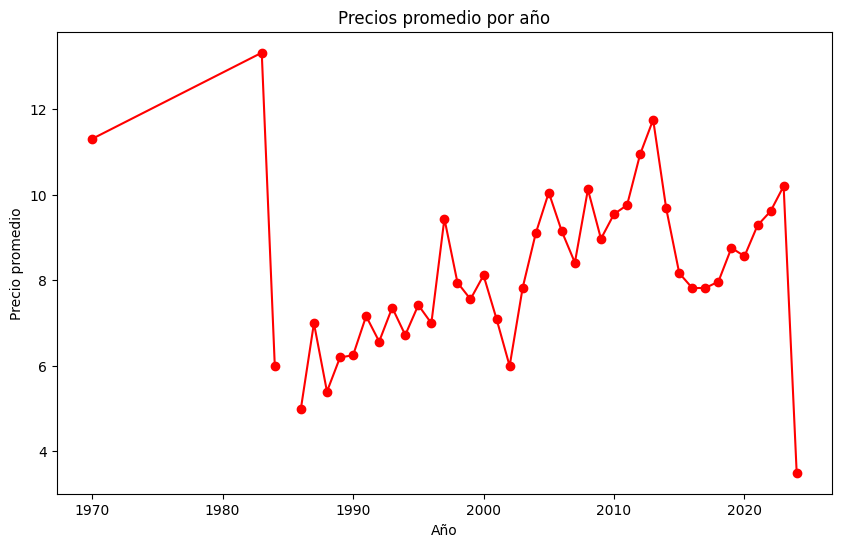

In [32]:
#HAGO PRUEBAS CON PRECIOS Y FECHAS
# Filtrar los precios distintos de 0.00
accion_filt = accion[accion['Price'] != 0.00]

# Agrupar los precios por año
yearly_prices = accion_filt.groupby(accion_filt['Release date'].dt.year)['Price'].mean()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(yearly_prices.index, yearly_prices.values, marker='o', color='red')
ax.set_xlabel('Año')
ax.set_ylabel('Precio promedio')
ax.set_title('Precios promedio por año')
plt.show()

In [33]:
dfjunto = pd.concat(dataframes)
dfjunto

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,5.00E+08,200.0M,500.0M
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,1.00E+08,50.0M,100.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,1.00E+08,50.0M,100.0M
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,1.00E+08,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,1.00E+08,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
47358,Bicycle Challenge - Wastelands,2022-07-26,99.99,"0 .. 20,000",Hede,Hede,0.00E+00,2.00E+04,0,20.0K
47359,Primal Carnage: Onslaught,2016-12-29,14.99,"0 .. 20,000",Pub Games,Circle 5 Studios,0.00E+00,2.00E+04,0,20.0K
47360,Lost in Nature,2017-03-14,14.99,"0 .. 20,000",Moongate Digital,Moongate Digital,0.00E+00,2.00E+04,0,20.0K
47361,HEVN,2018-09-24,9.99,"0 .. 20,000",Miga,Miga,0.00E+00,2.00E+04,0,20.0K


In [34]:
#PREPARO EL DFJUNTO CON DUPLICADOS Y COLUMNAS DE CATEGORIAS PARA POWERBI
# dataframes = [accion, aventura, deportes, early, estrategia, free, mmorpg, rpg, simulacion, indie]
# # Nombres de los dataframes como cadenas de texto
# dataframe_nombres = ['accion', 'aventura', 'deportes', 'early', 'estrategia', 'free', 'mmorpg', 'rpg', 'simulacion', 'indie']

# # Iterar sobre cada dataframe en la lista "dataframes"
# for df_nombre, df_string in zip(dataframes, dataframe_nombres):
#     # Crear una nueva columna en el dataframe "preparado" con el nombre del dataframe actual en el bucle
#     dfjunto[df_string] = dfjunto['Game'].isin(df_nombre['Game']).astype(int)

In [35]:
#Guardo un csv juntos con duplicados, para PowerBI
dfjunto.to_csv("Powerbijunto.csv", index=False)

In [36]:
#Hemos visto que en dfjunto hay duplicados, los hemos revisado y hemos visto que son iguales, pero con distintas categorias claro
#Vamos a eliminarlos, porque ya tenemos los df separados por categorias
dfjunto = dfjunto.drop_duplicates()

In [37]:
dfjunto

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,5.00E+08,200.0M,500.0M
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,1.00E+08,50.0M,100.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,1.00E+08,50.0M,100.0M
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,1.00E+08,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,1.00E+08,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,2.00E+04,0,20.0K
47344,Trekking and Camping Sketch Edition,2018-07-28,NaN,"0 .. 20,000",Hont,Hont,0.00E+00,2.00E+04,0,20.0K
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,2.00E+04,0,20.0K
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,2.00E+04,0,20.0K


In [38]:

# Filtrar precios distintos de 0.00
dfjunto_precio = dfjunto[dfjunto['Price'] != 0.00]

# Agrupar los precios por año
yearly_prices = dfjunto_precio.groupby(dfjunto_precio['Release date'].dt.year)['Price'].mean().reset_index()

# Crear el gráfico
fig = px.line(yearly_prices, x='Release date', y='Price', title='Precios promedio por año')
fig.show()

In [39]:
# accion.to_csv("accion_limpio.csv", index=False)
# aventura.to_csv("aventura_limpio.csv", index=False)
# deportes.to_csv("deportes_limpio.csv", index=False)
# early.to_csv("early_limpio.csv", index=False)
# estrategia.to_csv("estrategia_limpio.csv", index=False)
# free.to_csv("free_limpio.csv", index=False)
# mmorpg.to_csv("mmorpg_limpio.csv", index=False)
# rpg.to_csv("rpg_limpio.csv", index=False)
# simulacion.to_csv("simulacion_limpio.csv", index=False)
# indie.to_csv("indie_limpio.csv", index=False)
# dfjunto.to_csv("dfjunto.csv", index=False)

In [40]:
free["Price"].value_counts()

0.0    3002
Name: Price, dtype: int64

In [41]:
dfjunto["Owners_max_text"].value_counts()

20.0K     46283
50.0K      8083
100.0K     4107
200.0K     2747
500.0K     2322
1.0M        997
2.0M        564
5.0M        368
10.0M        96
20.0M        42
50.0M        21
100.0M        7
500.0M        1
Name: Owners_max_text, dtype: int64

In [42]:
dfjunto['Owners_max'] = pd.to_numeric(dfjunto['Owners_max'], errors='coerce')

In [43]:
# filtramos los datos para juegos con owners_max_text >= 100000000.0
dfjunto_topmax = dfjunto[dfjunto["Owners_max"] >= 100000000.0]

# formateamos la fecha para que solo muestre el año y el mes
dfjunto_topmax["Release date"] = pd.to_datetime(dfjunto_topmax["Release date"]).dt.strftime('%Y-%m')

# graficamos usando plotly express
fig = px.bar(dfjunto_topmax, x="Game", y="Owners_max", color="Release date")

# ajustamos el tamaño y la posición de la leyenda
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()

In [44]:
dfjunto_30 = dfjunto[dfjunto["Owners_max"] >= 50000000.0]
dfjunto_30["Release date"] = dfjunto_30["Release date"].replace("N/A", np.nan)
dfjunto_30 = dfjunto_30.dropna(subset=["Release date"])
dfjunto_30["Release date"] = pd.to_datetime(dfjunto_30["Release date"])
dfjunto_30["Release date"] = dfjunto_30["Release date"].dt.strftime('%Y')

fig = px.scatter(dfjunto_30, x="Price", y="Game", color="Game", hover_name="Game",
                 hover_data=["Release date"],
                 size="Owners_max", size_max=20,
                 labels={"Game": "Game", "Price": "Price"},
                 title="Lista de juegos de más de 50M de jugadores")

fig.update_layout(
    showlegend=False,
    height=1200,
    width=800,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)
fig.show()

In [45]:
dfjunto

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K
47344,Trekking and Camping Sketch Edition,2018-07-28,NaN,"0 .. 20,000",Hont,Hont,0.00E+00,20000.0,0,20.0K
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K


In [46]:
df_filtered = dfjunto[dfjunto['Price'] >= 99.99]

fig = px.scatter(df_filtered, x="Price", y="Release date", size="Owners_max", 
                 color="Owners_max", hover_name="Game", log_x=True,
                 color_continuous_scale="Spectral")

fig.show()

In [47]:
fig = px.bar(dfjunto["Publisher(s)"].value_counts().head(50), 
             x=dfjunto["Publisher(s)"].value_counts().head(50).index, 
             y=dfjunto["Publisher(s)"].value_counts().head(50).values,
             labels={'x': 'Publisher', 'y': 'Count'},
             title='Top 100 Publishers by Game Count')

fig.update_layout(title_font_size=24)
fig.show()

In [48]:
dfjunto["Publisher(s)"].value_counts().head(100)

Big Fish Games                     451
Choice of Games                    164
SEGA                               152
Laush Studio                       148
Strategy First                     145
                                  ... 
khukhrovr                           39
Stegalosaurus Game Development      39
DigiPen Institute of Technology     39
橙光游戏                                39
kovalevviktor                       39
Name: Publisher(s), Length: 100, dtype: int64

In [49]:
dfjunto.loc[dfjunto['Publisher(s)'] == 'Valve']

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M
10,Left 4 Dead 2,2009-11-16,9.99,"20,000,000 .. 50,000,000",Valve,Valve,2.00E+07,50000000.0,20.0M,50.0M
20,Half-Life 2: Lost Coast,2005-10-27,NaN,"20,000,000 .. 50,000,000",Valve,Valve,2.00E+07,50000000.0,20.0M,50.0M
25,Half-Life,1998-11-08,9.99,"10,000,000 .. 20,000,000",Valve,Valve,1.00E+07,20000000.0,10.0M,20.0M
26,Portal 2,2011-04-18,1.99,"10,000,000 .. 20,000,000",Valve,Valve,1.00E+07,20000000.0,10.0M,20.0M
27,Portal,2007-10-10,9.99,"10,000,000 .. 20,000,000",Valve,Valve,1.00E+07,20000000.0,10.0M,20.0M
29,Counter-Strike: Source,2004-11-01,9.99,"10,000,000 .. 20,000,000",Valve,Valve,1.00E+07,20000000.0,10.0M,20.0M
30,Counter-Strike,2000-11-01,9.99,"10,000,000 .. 20,000,000",Valve,Valve,1.00E+07,20000000.0,10.0M,20.0M


In [50]:
top_publishers = dfjunto.groupby('Publisher(s)')['Owners_max'].sum().sort_values(ascending=False).head(50)
top_publishers

Publisher(s)
Valve                                                       1.089570e+09
Electronic Arts                                             2.928100e+08
Amazon Games                                                2.550000e+08
Ubisoft                                                     2.467600e+08
Rockstar Games                                              2.168000e+08
Bethesda Softworks                                          1.424300e+08
SEGA                                                        1.283900e+08
Xbox Game Studios                                           1.269500e+08
2K                                                          1.224800e+08
KRAFTON, Inc.                                               1.016500e+08
Paradox Interactive                                         9.732000e+07
Square Enix                                                 8.898000e+07
Activision                                                  8.584000e+07
Coffee Stain Publishing               

In [51]:
dfjunto.groupby('Publisher(s)')['Owners_max'].sum().sort_values(ascending=False).head(15)

Publisher(s)
Valve                      1.089570e+09
Electronic Arts            2.928100e+08
Amazon Games               2.550000e+08
Ubisoft                    2.467600e+08
Rockstar Games             2.168000e+08
Bethesda Softworks         1.424300e+08
SEGA                       1.283900e+08
Xbox Game Studios          1.269500e+08
2K                         1.224800e+08
KRAFTON, Inc.              1.016500e+08
Paradox Interactive        9.732000e+07
Square Enix                8.898000e+07
Activision                 8.584000e+07
Coffee Stain Publishing    8.442000e+07
CAPCOM Co., Ltd.           8.200000e+07
Name: Owners_max, dtype: float64

In [52]:
#Owners máx no podemos hacer mucho caso, que no son las COMPRAS ni mucho menos.
top_publishers = dfjunto.groupby('Publisher(s)')['Owners_max'].sum().sort_values(ascending=False).head(15)

fig = go.Figure(go.Bar(
    y=top_publishers.index,
    x=top_publishers.values,
    orientation='h',
    marker=dict(
        color='rgba(0, 128, 128, 0.6)',
        line=dict(color='rgba(0, 128, 128, 1.0)', width=1)
    )
))

fig.update_layout(
    title='Top 10 Publishers by Owners_max',
    yaxis_title='Publisher',
    xaxis_title='Owners_max',
    font=dict(size=12),
    width=1000,
    height=500,
    autosize=True
)

fig.show()

In [53]:
dfjunto.groupby('Publisher(s)')['Owners_max'].sum().sort_values(ascending=False).head(15)

Publisher(s)
Valve                      1.089570e+09
Electronic Arts            2.928100e+08
Amazon Games               2.550000e+08
Ubisoft                    2.467600e+08
Rockstar Games             2.168000e+08
Bethesda Softworks         1.424300e+08
SEGA                       1.283900e+08
Xbox Game Studios          1.269500e+08
2K                         1.224800e+08
KRAFTON, Inc.              1.016500e+08
Paradox Interactive        9.732000e+07
Square Enix                8.898000e+07
Activision                 8.584000e+07
Coffee Stain Publishing    8.442000e+07
CAPCOM Co., Ltd.           8.200000e+07
Name: Owners_max, dtype: float64

In [54]:
#ESTE NO TIENE MUCHO SENTIDO
top_publishers = dfjunto.groupby('Publisher(s)')['Price'].sum().sort_values(ascending=False).head(15)

fig = go.Figure(go.Bar(
    y=top_publishers.index,
    x=top_publishers.values,
    orientation='h',
    marker=dict(
        color='rgba(0, 128, 128, 0.6)',
        line=dict(color='rgba(0, 128, 128, 1.0)', width=1)
    )
))

fig.update_layout(
    title='Top 15 Publishers by Price',
    yaxis_title='Publisher',
    xaxis_title='Price',
    font=dict(size=12),
    width=1000,
    height=500,
    autosize=True
)

fig.show()

In [55]:
# Filtrar precios distintos de 0.00
dfjunto_precio = dfjunto[dfjunto['Price'] != 0.00]

# Obtener el número de juegos publicados por cada editor
publisher_counts = dfjunto_precio.groupby('Publisher(s)')['Game'].nunique().reset_index()

# Ordenar los editores por cantidad de juegos publicados y obtener los primeros 15
top_publishers = publisher_counts.sort_values('Game', ascending=False).head(15)['Publisher(s)']

# Filtrar los datos para los primeros 15 editores
top_publisher_prices = dfjunto_precio[dfjunto_precio['Publisher(s)'].isin(top_publishers)]

# Calcular el precio promedio por editor
publisher_prices = top_publisher_prices.groupby('Publisher(s)')['Price'].mean().reset_index()

# Obtener el número de juegos por editor para los primeros 15 editores
games_per_publisher = publisher_counts[publisher_counts['Publisher(s)'].isin(top_publishers)]

# Crear el gráfico
fig = go.Figure()
fig.add_trace(go.Bar(x=publisher_prices['Publisher(s)'],
                     y=publisher_prices['Price'],
                     name='Precio promedio',
                     marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=games_per_publisher['Publisher(s)'],
                     y=games_per_publisher['Game'],
                     name='Número de juegos',
                     marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Precio promedio y número de juegos de los primeros 15 publishers con más juegos publicados',
                  xaxis_title='Publisher',
                  yaxis_title='Precio promedio / Número de juegos',
                  barmode='group')
fig.show()

In [56]:
# Filtrar precios distintos de 0.00
dfjunto_precio = dfjunto[dfjunto['Price'] != 0.00]

# Obtener el número de juegos publicados por cada editor
publisher_counts = dfjunto_precio.groupby('Publisher(s)')['Game'].nunique().reset_index()

# Ordenar los editores por cantidad de juegos publicados y obtener los primeros 15
top_publishers = publisher_counts.sort_values('Game', ascending=False).head(15)['Publisher(s)']

# Filtrar los datos para los primeros 15 editores
top_publisher_prices = dfjunto_precio[dfjunto_precio['Publisher(s)'].isin(top_publishers)]

# Calcular el precio promedio por editor
publisher_prices = top_publisher_prices.groupby('Publisher(s)')['Price'].mean().reset_index()

# Crear el gráfico
fig = px.bar(publisher_prices, x='Publisher(s)', y='Price', title='Precio promedio de los primeros 15 publishers con más juegos publicados')
fig.show()

In [57]:
publisher_counts.sort_values('Game', ascending=False).head(15)['Publisher(s)']

3025           Big Fish Games
21721                    SEGA
4675          Choice of Games
14193            Laush Studio
23974          Strategy First
24606              THQ Nordic
22349           Sekai Project
26377                 Ubisoft
23637             Square Enix
28611                Ziggurat
23071         Slitherine Ltd.
9204       Fulqrum Publishing
1123     Alawar Entertainment
13293            Kagura Games
3582       Boogygames Studios
Name: Publisher(s), dtype: object

In [58]:
dfjunto

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K
47344,Trekking and Camping Sketch Edition,2018-07-28,NaN,"0 .. 20,000",Hont,Hont,0.00E+00,20000.0,0,20.0K
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K


In [59]:
dfjunto.isnull().sum()

Game                  2
Release date         20
Price              2731
Owners                0
Developer(s)         42
Publisher(s)        141
Owners_min            0
Owners_max            0
Owners_min_text       0
Owners_max_text       0
dtype: int64

In [60]:
dfjunto['dev_pub_relation'] = dfjunto.apply(lambda row: 'igual' if row['Developer(s)'] == row['Publisher(s)'] else 'distinto', axis=1)

counts = dfjunto['dev_pub_relation'].value_counts().reset_index()
counts.columns = ['relacion', 'conteo']

# Definir colores personalizados
colors = ['#F9A11F', '#83AF9B']

# Crear gráfico de pastel
fig = px.pie(counts, values='conteo', names='relacion', color='relacion', color_discrete_sequence=colors,
             hole=0.6, labels={'conteo': 'Porcentaje'})

# Configurar estilo y leyenda
fig.update_layout(title='Relación entre Developer(s) y Publisher(s)', title_font_size=20,
                  legend_title='Relación', legend_traceorder='reversed')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [61]:
accion

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,5.00E+08,200.0M,500.0M
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,1.00E+08,50.0M,100.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,1.00E+08,50.0M,100.0M
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,1.00E+08,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,1.00E+08,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
27985,Rushing Beat Of Rage,2021-01-05,8.99,"0 .. 20,000",Joystick Studio,Joystick Studio,0.00E+00,2.00E+04,0,20.0K
27986,Welcome To... Chichester 2 - Part II : No Extr...,2021-09-30,9.99,"0 .. 20,000",Triority Interactive Novels,Triority Interactive Novels,0.00E+00,2.00E+04,0,20.0K
27987,Nova Odessa - The Strange Tower,2021-02-27,0.74,"0 .. 20,000",Leonardo Alexandrino,Leonardo Alexandrino,0.00E+00,2.00E+04,0,20.0K
27988,The Trivial Dead,2021-03-16,2.99,"0 .. 20,000",Big Red Eight,Big Red Eight,0.00E+00,2.00E+04,0,20.0K


In [62]:
top_15_nuevos = accion.sort_values(by='Release date', ascending=False).head(15)

In [63]:
# Obtener los 15 juegos más nuevos
df_top15 = accion.nlargest(15, "Release date")

# Crear el gráfico de barras horizontales
fig = go.Figure(go.Bar(
    x=df_top15["Release date"],
    y=df_top15["Game"],
    orientation="h",
    text=df_top15["Price"],
    hovertemplate=
        "<b>%{y}</b><br>" +
        "Fecha de lanzamiento: %{x}<br>" +
        "Plataforma: %{text}<br>"
))

# Personalizar el gráfico
fig.update_layout(
    title="Los 15 juegos más nuevos de la categoría Acción",
    xaxis_title="Fecha de lanzamiento",
    yaxis_title="Juego",
    height=600
)

# Mostrar el gráfico
fig.show()

In [64]:
accion

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,5.00E+08,200.0M,500.0M
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,1.00E+08,50.0M,100.0M
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,1.00E+08,50.0M,100.0M
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,1.00E+08,50.0M,100.0M
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,1.00E+08,50.0M,100.0M
...,...,...,...,...,...,...,...,...,...,...
27985,Rushing Beat Of Rage,2021-01-05,8.99,"0 .. 20,000",Joystick Studio,Joystick Studio,0.00E+00,2.00E+04,0,20.0K
27986,Welcome To... Chichester 2 - Part II : No Extr...,2021-09-30,9.99,"0 .. 20,000",Triority Interactive Novels,Triority Interactive Novels,0.00E+00,2.00E+04,0,20.0K
27987,Nova Odessa - The Strange Tower,2021-02-27,0.74,"0 .. 20,000",Leonardo Alexandrino,Leonardo Alexandrino,0.00E+00,2.00E+04,0,20.0K
27988,The Trivial Dead,2021-03-16,2.99,"0 .. 20,000",Big Red Eight,Big Red Eight,0.00E+00,2.00E+04,0,20.0K


# EMPIEZAN LAS PRUEBAS PARA HACER UNA REGRESIÓN DE PRECIO

In [65]:
preparado = dfjunto
preparado

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto
...,...,...,...,...,...,...,...,...,...,...,...
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto
47344,Trekking and Camping Sketch Edition,2018-07-28,NaN,"0 .. 20,000",Hont,Hont,0.00E+00,20000.0,0,20.0K,igual
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual


In [66]:
dataframes = [accion, aventura, deportes, early, estrategia, free, mmorpg, rpg, simulacion, indie]
# Nombres de los dataframes como cadenas de texto
dataframe_nombres = ['accion', 'aventura', 'deportes', 'early', 'estrategia', 'free', 'mmorpg', 'rpg', 'simulacion', 'indie']

# Iterar sobre cada dataframe en la lista "dataframes"
for df_nombre, df_string in zip(dataframes, dataframe_nombres):
    # Crear una nueva columna en el dataframe "preparado" con el nombre del dataframe actual en el bucle
    preparado[df_string] = preparado['Game'].isin(df_nombre['Game']).astype(int)

In [67]:
preparado["Release year"] = preparado["Release date"].dt.year

In [68]:
# preparado = preparado[preparado['Price'] > 0]
# preparado

In [69]:
preparado.isnull().sum()
preparado = preparado.dropna()

In [70]:
# Especifica el nombre de la columna objetivo en 'target_col_name'
target_col_name = 'Price'

# Especifica los nombres de las columnas que se deben considerar en 'feature_cols'
feature_cols = ['accion', 'aventura', 'deportes', 'early', 'estrategia', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year', 'Owners_max']

# Separa los datos en características (features) y la columna objetivo (target)
X_train = preparado[feature_cols].values
y_train = preparado[target_col_name].values
X_test = preparado[feature_cols].values
y_test = preparado[target_col_name].values
#Inicializamos modelo y parámetros
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 100
# Convertimos los datos a formato DMatrix
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Entrenamos y elaboramos predicciones
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = mse(y_test,model.predict(test_data))
print(mse_XGB**0.5)

13.244731238711497


In [71]:
test_data

In [72]:
juego = xgb.DMatrix(np.array([[0, 0, 0, 0, 1, 1, 0, 0, 0,2020]]))
model.predict(juego)

array([3.25524], dtype=float32)

In [73]:
pyca = preparado
pyca

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020.0
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018.0
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019.0
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020.0


In [74]:
#aplicamos un encoder a nuestro dataset
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for column in pyca:
#     pyca[column] = le.fit_transform(pyca[column])


In [75]:
pyca_selected = pyca[['accion', 'aventura', 'deportes', 'early', 'estrategia', 'free', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year', 'Price', 'Owners_max']]
pyca_selected

,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year,Price,Owners_max
0,1,0,0,0,1,1,0,0,0,0,2013.0,0.00,500000000.0
1,1,1,0,0,0,0,0,0,0,0,2015.0,29.98,100000000.0
2,1,0,0,0,0,1,0,0,0,0,2007.0,0.00,100000000.0
3,1,1,0,0,0,1,0,0,0,0,2020.0,0.00,100000000.0
4,1,0,0,0,0,1,0,0,0,0,2012.0,0.00,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,0,0,0,0,0,0,0,0,0,1,2018.0,0.99,20000.0
47334,0,0,0,0,0,0,0,0,0,1,2019.0,9.99,20000.0
47348,0,0,0,0,0,0,0,0,0,1,2019.0,1.99,20000.0
47349,0,0,0,0,0,0,0,0,0,1,2020.0,0.99,20000.0


# PYCARED

In [76]:
# from pycaret.regression import *
# from fast_ml import eda
# setup = setup(pyca_selected, target='Price',session_id=357)

In [77]:
# #Creamos una evaluación rápida de modelos
# best = compare_models()

In [78]:
# print(best)

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Especifica el nombre de la columna objetivo en 'target_col_name'
target_col_name = 'Price'

# Especifica los nombres de las columnas que se deben considerar en 'feature_cols'
feature_cols = ['accion', 'aventura', 'deportes', 'early', 'estrategia', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year', 'Owners_max']

# Separa los datos en características (features) y la columna objetivo (target)
X_train = preparado[feature_cols].values
y_train = preparado[target_col_name].values
X_test = preparado[feature_cols].values
y_test = preparado[target_col_name].values

# Inicializamos el modelo y establecemos los parámetros
model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos el error cuadrático medio (MSE) en el conjunto de prueba
mse_ETR = mean_squared_error(y_test, y_pred)

# Imprimimos la raíz del MSE para obtener una medida de la precisión del modelo
print(mse_ETR**0.5)


12.592145194514108


In [80]:
from sklearn.ensemble import ExtraTreesRegressor

# Seleccionar características y variable objetivo
X = pyca_selected[['accion', 'aventura', 'deportes', 'early', 'estrategia', 'free', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year', 'Owners_max']]
y = pyca_selected['Price']

# Crear instancia del modelo
model = ExtraTreesRegressor(n_jobs=-1, random_state=357)

# Ajustar el modelo a los datos
model.fit(X, y)

ExtraTreesRegressor(n_jobs=-1, random_state=357)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleccionar características y variable objetivo
X = pyca_selected[['accion', 'aventura', 'deportes', 'early', 'estrategia', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year', 'Owners_max']]
y = pyca_selected['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear instancia del modelo
model = ExtraTreesRegressor(n_jobs=-1, random_state=357)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)

print('MSE: ', mse**0.5)

MSE:  10.872523839883174


In [82]:
# Predecir precios para nuevos datos
X_new = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 2015, 50000]]
y_pred = model.predict(X_new)
print(y_pred)

[1.6788]


c:\Users\jroig\Documents\VSCode\samplerepo\venv_analytics\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names



In [83]:
pyca

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020.0
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018.0
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019.0
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020.0


In [84]:
# # aplicamos un encoder a nuestro dataset
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for column in pyca:
#     pyca[column] = le.fit_transform(pyca[column])

C:\Users\jroig\AppData\Local\Temp\ipykernel_23036\1532871952.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



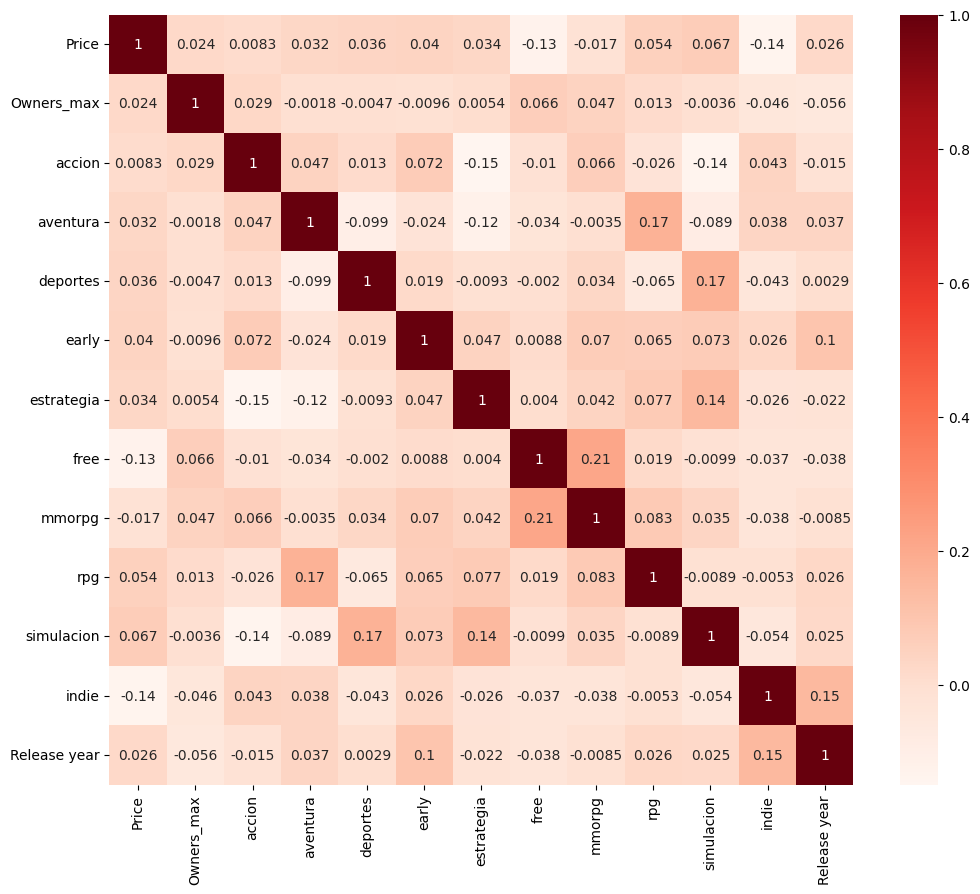

In [85]:
# Calcular la matriz de correlación, VAMOS A VER SUS RELACIONES 
corr_matrix = pyca.corr()

# Crear un mapa de calor con todas las correlaciones
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [86]:
top_devs = pyca.groupby('Developer(s)').count().sort_values('Game', ascending=False).head(50).index.tolist()
top_devs

['Choice of Games',
 'Laush Dmitriy Sergeevich',
 'Sokpop Collective',
 'Hosted Games',
 'Boogygames Studios',
 'KOEI TECMO GAMES CO., LTD.',
 'Reforged Group',
 'Elephant Games',
 'Dnovel',
 'Blender Games',
 'EroticGamesClub',
 'Atomic Fabrik, Cristian Manolachi',
 'RewindApp',
 'Cyber Keks',
 '玫瑰工作室',
 'Ripknot Systems',
 'AMAX Interactive',
 'Eipix Entertainment',
 'Nikita "Ghost_RUS"',
 'SEGA',
 'Kotovodk Studio',
 'LTZinc',
 'IR Studio',
 'Kairosoft Co.,Ltd',
 'Snkl Studio',
 'Winter Wolves',
 'ImperiumGame',
 'Sweet Games',
 'Anamik Majumdar',
 'Winged Cloud',
 'EpiXR Games UG',
 'Square Enix',
 'Stegalosaurus Game Development',
 'Dharker Studio',
 'Luci Entertainment',
 'QuickBobber',
 'Domini Games',
 'For Kids',
 'HexWar Games',
 '橙光游戏',
 'Racing Bros',
 'Warfare Studios',
 'Hede',
 'Enoops',
 'owlyboi',
 'Archor Wright',
 'JY',
 'Exe Create Inc.',
 'Milestone S.r.l.',
 'CSM']

In [87]:
# Obtener los 50 desarrolladores con más juegos
top_devs = pyca.groupby('Developer(s)').count().sort_values('Game', ascending=False).head(50).index.tolist()

# Añadir los nuevos desarrolladores a la lista
new_devs = ['Valve', 'Electronic Arts', 'Amazon Games', 'Ubisoft', 'Rockstar Games', 'Bethesda Softworks', 'Xbox Game Studios', '2K', 'Paradox Interactive', 'CAPCOM Co., Ltd.']
top_devs += new_devs

# Eliminar duplicados
top_devs = list(set(top_devs))
top_devs

['QuickBobber',
 'Hede',
 'Cyber Keks',
 'Rockstar Games',
 'HexWar Games',
 'LTZinc',
 'EpiXR Games UG',
 'Enoops',
 'Laush Dmitriy Sergeevich',
 'Paradox Interactive',
 'Domini Games',
 'Kotovodk Studio',
 'Ubisoft',
 'Anamik Majumdar',
 'Milestone S.r.l.',
 'Electronic Arts',
 'ImperiumGame',
 'RewindApp',
 'Dharker Studio',
 'Amazon Games',
 'Winged Cloud',
 'Bethesda Softworks',
 'Luci Entertainment',
 'Nikita "Ghost_RUS"',
 'Atomic Fabrik, Cristian Manolachi',
 'Archor Wright',
 'IR Studio',
 'Boogygames Studios',
 'Dnovel',
 'JY',
 'Ripknot Systems',
 'Reforged Group',
 'Sokpop Collective',
 'Elephant Games',
 'Sweet Games',
 'Blender Games',
 'Square Enix',
 'Kairosoft Co.,Ltd',
 '橙光游戏',
 'owlyboi',
 'Exe Create Inc.',
 'Valve',
 'Xbox Game Studios',
 'CAPCOM Co., Ltd.',
 'KOEI TECMO GAMES CO., LTD.',
 'Snkl Studio',
 'CSM',
 'Stegalosaurus Game Development',
 '2K',
 'AMAX Interactive',
 'Eipix Entertainment',
 'Winter Wolves',
 'EroticGamesClub',
 '玫瑰工作室',
 'Warfare Studios',


In [88]:
dev_mask = pyca['Developer(s)'].isin(top_devs)

# Filtrar el DataFrame pyca
pyca_filtered = pyca[dev_mask]

# Mostrar el DataFrame resultante
pyca_filtered

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
5,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",Amazon Games,Amazon Games,5.00E+07,100000000.0,50.0M,100.0M,igual,1,1,0,0,0,0,1,1,0,0,2021.0
10,Left 4 Dead 2,2009-11-16,9.99,"20,000,000 .. 50,000,000",Valve,Valve,2.00E+07,50000000.0,20.0M,50.0M,igual,1,0,0,0,0,0,0,0,0,0,2009.0
25,Half-Life,1998-11-08,9.99,"10,000,000 .. 20,000,000",Valve,Valve,1.00E+07,20000000.0,10.0M,20.0M,igual,1,0,0,0,0,0,0,0,0,0,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47196,Girls Memory Card,2020-07-14,1.99,"0 .. 20,000",Laush Dmitriy Sergeevich,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2020.0
47229,Intelligence,2018-04-19,4.99,"0 .. 20,000",Laush Dmitriy Sergeevich,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0
47233,Love Hentai: Sexy Body,2018-10-01,0.99,"0 .. 20,000",CSM,W.T.B.,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0
47315,BAFF 4,2019-09-25,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0


In [89]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder y ajustarlo a los valores únicos de la columna Developer(s)
le = LabelEncoder()
le.fit(pyca_filtered['Developer(s)'].unique())

# Aplicar el LabelEncoder a la columna Developer(s)
pyca_filtered['Developer(s)'] = le.transform(pyca_filtered['Developer(s)'])

# Mostrar el DataFrame resultante
pyca_filtered

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",50,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",50,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
5,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",1,Amazon Games,5.00E+07,100000000.0,50.0M,100.0M,igual,1,1,0,0,0,0,1,1,0,0,2021.0
10,Left 4 Dead 2,2009-11-16,9.99,"20,000,000 .. 50,000,000",50,Valve,2.00E+07,50000000.0,20.0M,50.0M,igual,1,0,0,0,0,0,0,0,0,0,2009.0
25,Half-Life,1998-11-08,9.99,"10,000,000 .. 20,000,000",50,Valve,1.00E+07,20000000.0,10.0M,20.0M,igual,1,0,0,0,0,0,0,0,0,0,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47196,Girls Memory Card,2020-07-14,1.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2020.0
47229,Intelligence,2018-04-19,4.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0
47233,Love Hentai: Sexy Body,2018-10-01,0.99,"0 .. 20,000",9,W.T.B.,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0
47315,BAFF 4,2019-09-25,1.99,"0 .. 20,000",6,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0


In [90]:
developer_options = pyca_filtered['Developer(s)'].unique().tolist()
developer_dict = {developer_options[i]: i for i in range(len(developer_options))}
pyca_filtered['dev_code'] = pyca_filtered['Developer(s)'].map(developer_dict)

In [91]:
pyca_filtered

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year,dev_code
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",50,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0,0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",50,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0,0
5,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",1,Amazon Games,5.00E+07,100000000.0,50.0M,100.0M,igual,1,1,0,0,0,0,1,1,0,0,2021.0,1
10,Left 4 Dead 2,2009-11-16,9.99,"20,000,000 .. 50,000,000",50,Valve,2.00E+07,50000000.0,20.0M,50.0M,igual,1,0,0,0,0,0,0,0,0,0,2009.0,0
25,Half-Life,1998-11-08,9.99,"10,000,000 .. 20,000,000",50,Valve,1.00E+07,20000000.0,10.0M,20.0M,igual,1,0,0,0,0,0,0,0,0,0,1998.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47196,Girls Memory Card,2020-07-14,1.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2020.0,23
47229,Intelligence,2018-04-19,4.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0,23
47233,Love Hentai: Sexy Body,2018-10-01,0.99,"0 .. 20,000",9,W.T.B.,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0,36
47315,BAFF 4,2019-09-25,1.99,"0 .. 20,000",6,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0,16


In [92]:
pyca_filtered["Owners"].value_counts()

0 .. 20,000                   2290
20,000 .. 50,000               273
50,000 .. 100,000               86
100,000 .. 200,000              55
200,000 .. 500,000              47
500,000 .. 1,000,000            21
1,000,000 .. 2,000,000          19
2,000,000 .. 5,000,000          17
5,000,000 .. 10,000,000          9
10,000,000 .. 20,000,000         7
50,000,000 .. 100,000,000        2
200,000,000 .. 500,000,000       1
20,000,000 .. 50,000,000         1
Name: Owners, dtype: int64

In [93]:
# pyca_filtered.to_csv('pyca_filtered.csv', index=False)

In [94]:
from sklearn.ensemble import ExtraTreesRegressor

# Seleccionar características y variable objetivo
X = pyca_filtered[['accion', 'aventura', 'deportes', 'early', 'estrategia', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year', 'Owners_max', 'Developer(s)']]
y = pyca_filtered['Price']

# Crear instancia del modelo
model = ExtraTreesRegressor(n_jobs=-1, random_state=357)

# Ajustar el modelo a los datos
model.fit(X, y)

ExtraTreesRegressor(n_jobs=-1, random_state=357)

In [95]:
#AQUIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleccionar características y variable objetivo
X = pyca_filtered[['accion', 'aventura', 'deportes', 'early', 'estrategia', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year', 'Owners_max', 'Developer(s)']]
y = pyca_filtered['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

# Crear instancia del modelo
model = ExtraTreesRegressor(n_jobs=-1, random_state=314)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)

print('MSE: ', mse**0.5)

MSE:  7.264317524344595


In [97]:
# Guardar modelo en un archivo .pkl
# with open('precio_pred.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [98]:
# Predecir precios para nuevos datos
X_new = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 2015, 50000,20]]
y_pred = model.predict(X_new)
print(y_pred)

[15.0402]


c:\Users\jroig\Documents\VSCode\samplerepo\venv_analytics\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names



# VAMOS A EMPEZAR A TRABAJAR PARA HACER UNA CLASIFICACIÓN

In [99]:
#aplicamos un encoder a nuestro dataset
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for column in pyca:
#     pyca[column] = le.fit_transform(pyca[column])


In [100]:
# pyca = pyca.drop(['Game', 'Release date', 'Owners', 'Publisher(s)', 'Owners_min', 'Owners_min_text', 'Owners_max_text', 'dev_pub_relation'], axis=1)

In [101]:
pyca_filtered.columns

Index(['Game', 'Release date', 'Price', 'Owners', 'Developer(s)',
       'Publisher(s)', 'Owners_min', 'Owners_max', 'Owners_min_text',
       'Owners_max_text', 'dev_pub_relation', 'accion', 'aventura', 'deportes',
       'early', 'estrategia', 'free', 'mmorpg', 'rpg', 'simulacion', 'indie',
       'Release year', 'dev_code'],
      dtype='object')

In [102]:
# from pycaret.regression import *
# from fast_ml import eda
# setup = setup(pyca, target='Owners_max',session_id=357)

In [103]:
# #Creamos una evaluación rápida de modelos
# best = compare_models()

In [104]:
# best

In [105]:
pyca_filtered["Owners"].astype('category')

0        200,000,000 .. 500,000,000
2         50,000,000 .. 100,000,000
5         50,000,000 .. 100,000,000
10         20,000,000 .. 50,000,000
25         10,000,000 .. 20,000,000
                    ...            
47196                   0 .. 20,000
47229                   0 .. 20,000
47233                   0 .. 20,000
47315                   0 .. 20,000
47348                   0 .. 20,000
Name: Owners, Length: 2828, dtype: category
Categories (13, object): ['0 .. 20,000', '1,000,000 .. 2,000,000', '10,000,000 .. 20,000,000', '100,000 .. 200,000', ..., '5,000,000 .. 10,000,000', '50,000,000 .. 100,000,000', '50,000 .. 100,000', '500,000 .. 1,000,000']

In [106]:
pyca_filtered

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year,dev_code
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",50,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0,0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",50,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0,0
5,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",1,Amazon Games,5.00E+07,100000000.0,50.0M,100.0M,igual,1,1,0,0,0,0,1,1,0,0,2021.0,1
10,Left 4 Dead 2,2009-11-16,9.99,"20,000,000 .. 50,000,000",50,Valve,2.00E+07,50000000.0,20.0M,50.0M,igual,1,0,0,0,0,0,0,0,0,0,2009.0,0
25,Half-Life,1998-11-08,9.99,"10,000,000 .. 20,000,000",50,Valve,1.00E+07,20000000.0,10.0M,20.0M,igual,1,0,0,0,0,0,0,0,0,0,1998.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47196,Girls Memory Card,2020-07-14,1.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2020.0,23
47229,Intelligence,2018-04-19,4.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0,23
47233,Love Hentai: Sexy Body,2018-10-01,0.99,"0 .. 20,000",9,W.T.B.,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0,36
47315,BAFF 4,2019-09-25,1.99,"0 .. 20,000",6,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0,16


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# selección de características

X = pyca_filtered[['accion', 'aventura', 'deportes', 'early', 'estrategia', 'mmorpg', 'rpg', 'simulacion', 'indie','Release year','Price', 'dev_code']].values
y = pyca_filtered['Owners'].values
# separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# crear un modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# entrenar el modelo en los datos de entrenamiento
rf_model.fit(X_train, y_train)

# hacer predicciones en los datos de prueba
y_pred = rf_model.predict(X_test)

# evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8127208480565371


In [108]:
# # Guardar el modelo entrenado en un archivo pkl
# with open('rf_model.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [109]:
pyca_filtered["dev_code"]

0         0
2         0
5         1
10        0
25        0
         ..
47196    23
47229    23
47233    36
47315    16
47348    16
Name: dev_code, Length: 2828, dtype: int64

In [110]:
sample = [0, 1, 0, 1, 0, 1, 0, 0, 0, 2015, 50,1]
predicted_owners = rf_model.predict([sample])
predicted_owners

array(['500,000\xa0..\xa01,000,000'], dtype=object)

# VAMOS A EMPEZAR A TRABAJAR PARA HACER UNA SERIE TEMPORAL

In [111]:
arima = preparado

In [112]:
arima

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020.0
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018.0
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019.0
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020.0


In [113]:
arima.columns

Index(['Game', 'Release date', 'Price', 'Owners', 'Developer(s)',
       'Publisher(s)', 'Owners_min', 'Owners_max', 'Owners_min_text',
       'Owners_max_text', 'dev_pub_relation', 'accion', 'aventura', 'deportes',
       'early', 'estrategia', 'free', 'mmorpg', 'rpg', 'simulacion', 'indie',
       'Release year'],
      dtype='object')

In [114]:
arima.dtypes

Game                        object
Release date        datetime64[ns]
Price                      float64
Owners                      object
Developer(s)                object
Publisher(s)                object
Owners_min                  object
Owners_max                 float64
Owners_min_text             object
Owners_max_text             object
dev_pub_relation            object
accion                       int32
aventura                     int32
deportes                     int32
early                        int32
estrategia                   int32
free                         int32
mmorpg                       int32
rpg                          int32
simulacion                   int32
indie                        int32
Release year               float64
dtype: object

In [115]:
#Hemos visto que los inferiores a 1990 son erroneos.
arima = arima.loc[arima['Release year'] >= 1990]

In [116]:
arima

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020.0
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018.0
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019.0
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020.0


In [117]:
# Convertir la columna "Release year" a un objeto de fecha y hora
arima['Release year'] = pd.to_datetime(arima['Release year'], format='%Y')

In [118]:
arima["Release year"]

0       2013-01-01
1       2015-01-01
2       2007-01-01
3       2020-01-01
4       2012-01-01
           ...    
47329   2018-01-01
47334   2019-01-01
47348   2019-01-01
47349   2020-01-01
47350   2022-01-01
Name: Release year, Length: 62680, dtype: datetime64[ns]

In [119]:
#Sobran los del 2024, ya que son prácticamente outliers para nuestro modelo
arima = arima.drop(arima[arima["Release year"] == "2024-01-01"].index)

In [120]:
arima['Release year'].dtypes

dtype('<M8[ns]')

In [121]:
arima

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013-01-01
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015-01-01
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007-01-01
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020-01-01
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018-01-01
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019-01-01
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019-01-01
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020-01-01


In [122]:
#vamos a considerar que los precios superiores a 100 son outliers
arima = arima[arima["Price"] < 100]

c:\Users\jroig\Documents\VSCode\samplerepo\venv_analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

c:\Users\jroig\Documents\VSCode\samplerepo\venv_analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

c:\Users\jroig\Documents\VSCode\samplerepo\venv_analytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



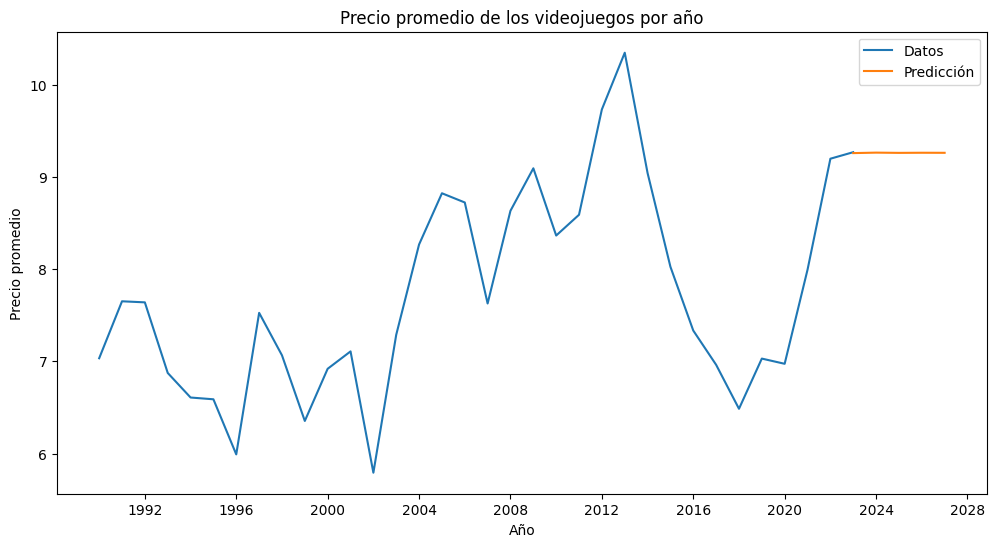

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Agrupar los datos por año y calcular la media de los precios
precio_anual = arima.groupby('Release year')['Price'].mean()

# Crear el modelo ARIMA para los datos anuales
modelo_arima = ARIMA(precio_anual, order=(1,1,1))
modelo_arima_fit = modelo_arima.fit()

# Obtener la predicción para los próximos 5 años
prediccion = modelo_arima_fit.predict(start=len(precio_anual), end=len(precio_anual)+4, typ='levels')

# Crear un rango de fechas para la predicción
fechas_pred = pd.date_range(start=str(precio_anual.index[-1]), periods=5, freq='AS')

# Graficar los datos originales y la predicción
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(precio_anual.index, precio_anual, label='Datos')
ax.plot(fechas_pred, prediccion, label='Predicción')
ax.legend()
ax.set_title('Precio promedio de los videojuegos por año')
ax.set_xlabel('Año')
ax.set_ylabel('Precio promedio')
plt.show()

In [124]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore") 

P = range(0, 6)
D = range(0, 3)
Q = range(0, 6)

best_aic = float("inf")
best_params = None

for p in P:
    for d in D:
        for q in Q:
            modelo_arima = ARIMA(precio_anual, order=(p, d, q))
            results = modelo_arima.fit()
            current_aic = results.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_params = (p, d, q)
            print(f"modelo arima: ({p},{d},{q}) => AIC = {current_aic}")

print(f"\nBest model: ({best_params[0]}, {best_params[1]}, {best_params[2]}) => AIC = {best_aic}")


modelo arima: (0,0,0) => AIC = 106.96339850731802
modelo arima: (0,0,1) => AIC = 87.53970372021384
modelo arima: (0,0,2) => AIC = 85.1254040351683
modelo arima: (0,0,3) => AIC = 86.29973768387475
modelo arima: (0,0,4) => AIC = 83.98179773624796
modelo arima: (0,0,5) => AIC = 85.28033867511782
modelo arima: (0,1,0) => AIC = 80.9746391451653
modelo arima: (0,1,1) => AIC = 82.84856701078897
modelo arima: (0,1,2) => AIC = 82.17148560084152
modelo arima: (0,1,3) => AIC = 83.7520627453953
modelo arima: (0,1,4) => AIC = 85.43614691163326
modelo arima: (0,1,5) => AIC = 83.60375496406887
modelo arima: (0,2,0) => AIC = 100.00899840752845
modelo arima: (0,2,1) => AIC = 84.83271060610244
modelo arima: (0,2,2) => AIC = 86.53838953105118
modelo arima: (0,2,3) => AIC = 86.50808161565887
modelo arima: (0,2,4) => AIC = 88.49964953149782
modelo arima: (0,2,5) => AIC = 90.47427220268028
modelo arima: (1,0,0) => AIC = 83.44586514331685
modelo arima: (1,0,1) => AIC = 83.26474649274007
modelo arima: (1,0,2)

In [125]:
arima

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013-01-01
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015-01-01
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007-01-01
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020-01-01
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018-01-01
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019-01-01
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019-01-01
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020-01-01


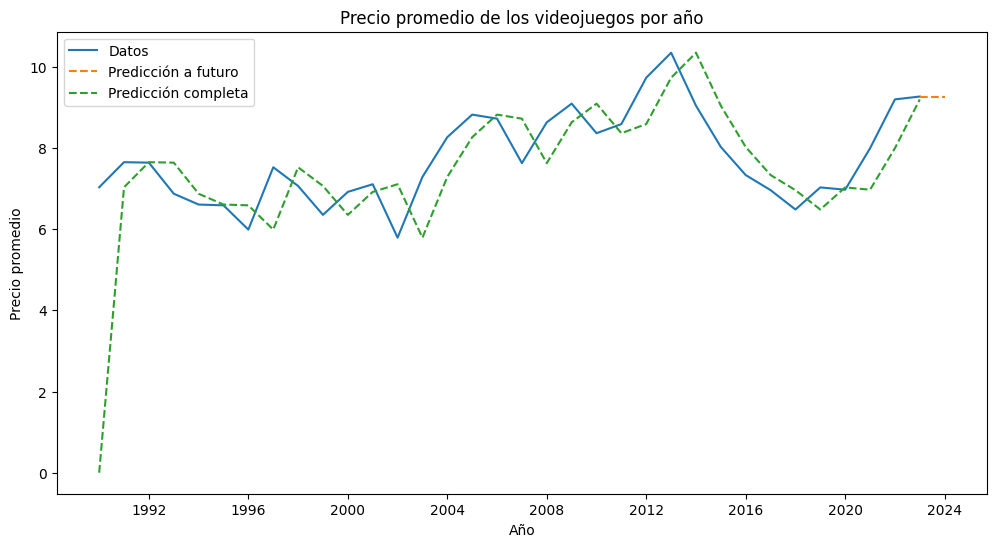

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Agrupar los datos por año y calcular la media de los precios
precio_anual = arima.groupby('Release year')['Price'].mean()

# Crear el modelo ARIMA para los datos anuales
modelo_arima = ARIMA(precio_anual, order=(0, 1, 0))
modelo_arima_fit = modelo_arima.fit()

# Obtener la predicción para los próximos 5 años
prediccion = modelo_arima_fit.predict(start=len(precio_anual), end=len(precio_anual)+1, typ='levels')

# Crear un rango de fechas para la predicción (solo los próximos dos años)
fechas_pred = pd.date_range(start=str(precio_anual.index[-1]), periods=2, freq='AS')

# Obtener la predicción completa
prediccion_completa = modelo_arima_fit.predict(start=precio_anual.index[0], end=precio_anual.index[-1], typ='levels')

# Graficar los datos originales, la predicción a futuro y la predicción completa
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(precio_anual.index, precio_anual, label='Datos')
ax.plot(fechas_pred, prediccion, label='Predicción a futuro', linestyle='--')
ax.plot(precio_anual.index, prediccion_completa, label='Predicción completa', linestyle='--')
ax.legend()
ax.set_title('Precio promedio de los videojuegos por año')
ax.set_xlabel('Año')
ax.set_ylabel('Precio promedio')
plt.show()

In [127]:
precio_anual


Release year
1990-01-01     7.033478
1991-01-01     7.651538
1992-01-01     7.640000
1993-01-01     6.873929
1994-01-01     6.607500
1995-01-01     6.588276
1996-01-01     5.990556
1997-01-01     7.526098
1998-01-01     7.065250
1999-01-01     6.353250
2000-01-01     6.919211
2001-01-01     7.107959
2002-01-01     5.791556
2003-01-01     7.287875
2004-01-01     8.267333
2005-01-01     8.823611
2006-01-01     8.723670
2007-01-01     7.627748
2008-01-01     8.633312
2009-01-01     9.094490
2010-01-01     8.365000
2011-01-01     8.590376
2012-01-01     9.732846
2013-01-01    10.348466
2014-01-01     9.042324
2015-01-01     8.026155
2016-01-01     7.334216
2017-01-01     6.962063
2018-01-01     6.485299
2019-01-01     7.029864
2020-01-01     6.973371
2021-01-01     7.995396
2022-01-01     9.198491
2023-01-01     9.269304
Name: Price, dtype: float64

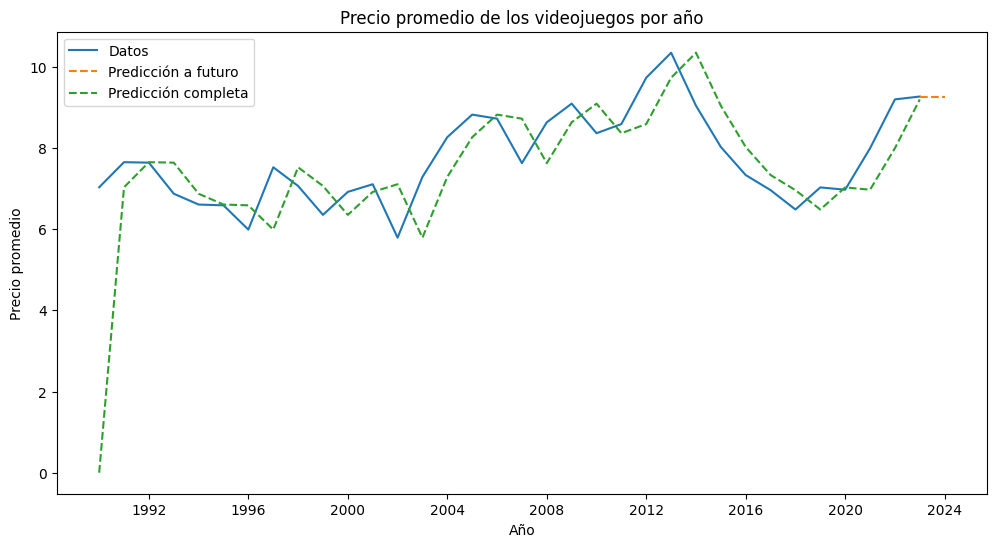

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Agrupar los datos por año y calcular la media de los precios
precio_anual = arima.groupby('Release year')['Price'].mean()

# Crear el modelo ARIMA para los datos anuales
modelo_arima = ARIMA(precio_anual, order=(0, 1, 0))
modelo_arima_fit = modelo_arima.fit()

# Obtener la predicción para los próximos 5 años
prediccion = modelo_arima_fit.forecast(steps=5)

# Crear un rango de fechas para los próximos dos años
fechas_futuras = pd.date_range(start=str(precio_anual.index[-1]), periods=2, freq='AS')

# Obtener la predicción para los próximos dos años
prediccion_futura = modelo_arima_fit.forecast(steps=2)

# Obtener la predicción completa
prediccion_completa = modelo_arima_fit.predict(start=precio_anual.index[0], end=precio_anual.index[-1], typ='levels')

# Graficar los datos originales, la predicción a futuro y la predicción completa
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(precio_anual.index, precio_anual, label='Datos')
ax.plot(fechas_futuras, prediccion_futura, label='Predicción a futuro', linestyle='--')
ax.plot(precio_anual.index, prediccion_completa, label='Predicción completa', linestyle='--')
ax.legend()
ax.set_title('Precio promedio de los videojuegos por año')
ax.set_xlabel('Año')
ax.set_ylabel('Precio promedio')
plt.show()


In [129]:
arima["Release year"].dtype

dtype('<M8[ns]')

In [130]:
# # Crear el archivo .pkl para guardar el modelo
# with open('modelo_arima.pkl', 'wb') as archivo:
#     # Guardar el modelo en el archivo .pkl
#     pickle.dump(modelo_arima_fit, archivo)

In [131]:
#Vamos a probarlo con MONTH
arima['Release Month'] = arima['Release date'].dt.strftime('%Y-%m')
arima

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year,Release Month
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013-01-01,2013-07
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015-01-01,2015-04
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007-01-01,2007-10
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020-01-01,2020-11
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012-01-01,2012-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018-01-01,2018-06
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019-01-01,2019-01
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019-01-01,2019-08
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020-01-01,2020-04


In [132]:
arima["Release year"].value_counts()

2022-01-01    10390
2021-01-01     9555
2020-01-01     8834
2018-01-01     7339
2019-01-01     7049
2017-01-01     5764
2016-01-01     3980
2023-01-01     3206
2015-01-01     2393
2014-01-01     1347
2013-01-01      515
2012-01-01      397
2011-01-01      319
2010-01-01      268
2009-01-01      245
2008-01-01      160
2007-01-01      111
2006-01-01      109
2003-01-01       80
2005-01-01       72
2004-01-01       60
2001-01-01       49
2002-01-01       45
1997-01-01       41
1999-01-01       40
1998-01-01       40
2000-01-01       38
1996-01-01       36
1994-01-01       32
1995-01-01       29
1993-01-01       28
1990-01-01       23
1992-01-01       20
1991-01-01       13
Name: Release year, dtype: int64

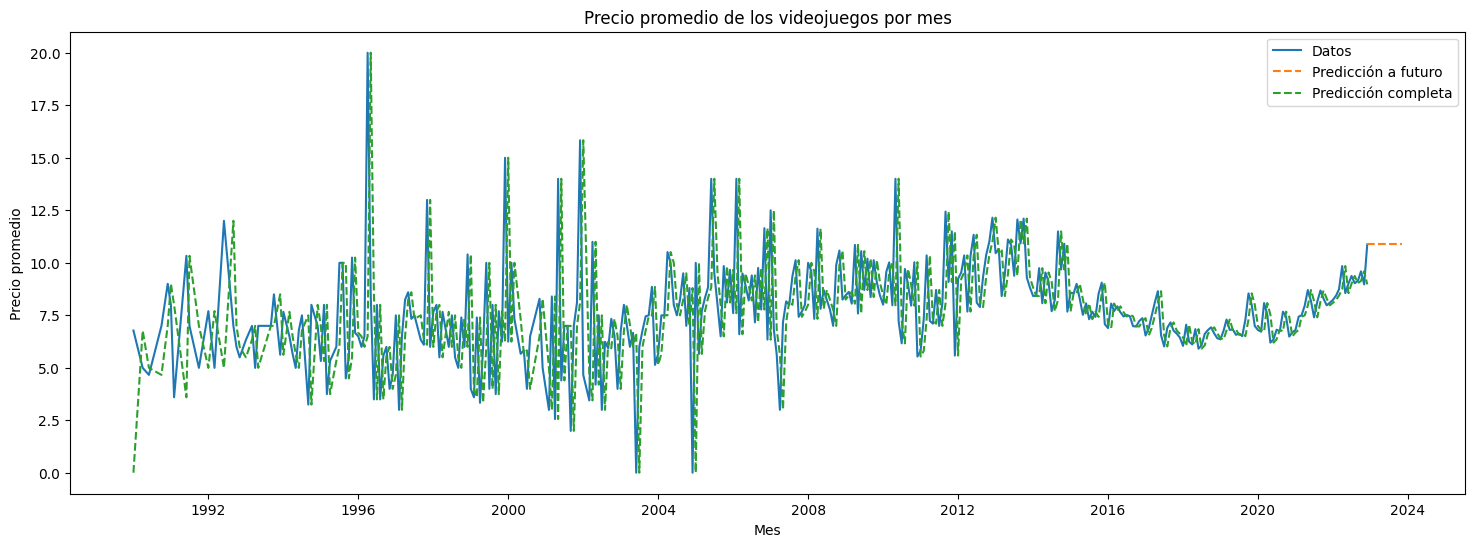

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#Dropeamos el 2023
arima = arima.drop(arima[arima["Release Month"] > "2023"].index)

# Convertir la columna "Release Month" a tipo fecha
arima['Release Month'] = pd.to_datetime(arima['Release Month'])

# Agrupar los datos por mes y calcular la media de los precios
precio_mensual = arima.groupby('Release Month')['Price'].mean()

# Crear el modelo ARIMA para los datos mensuales
modelo_arima = ARIMA(precio_mensual, order=(0, 1, 0))
modelo_arima_fit = modelo_arima.fit()

# Obtener la predicción para los próximos 12 meses
prediccion = modelo_arima_fit.forecast(steps=12)

# Crear un rango de fechas para los próximos doce meses
fechas_futuras = pd.date_range(start=str(precio_mensual.index[-1]), periods=12, freq='MS')

# Obtener la predicción para los próximos doce meses
prediccion_futura = modelo_arima_fit.forecast(steps=12)

# Obtener la predicción completa
prediccion_completa = modelo_arima_fit.predict(start=precio_mensual.index[0], end=precio_mensual.index[-1], typ='levels')

# Graficar los datos originales, la predicción a futuro y la predicción completa
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(precio_mensual.index, precio_mensual, label='Datos')
ax.plot(fechas_futuras, prediccion_futura, label='Predicción a futuro', linestyle='--')
ax.plot(precio_mensual.index, prediccion_completa, label='Predicción completa', linestyle='--')
ax.legend()
ax.set_title('Precio promedio de los videojuegos por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Precio promedio')
plt.show()


In [166]:
# # Crear el archivo .pkl para guardar el modelo
# with open('modelo_arima_meses.pkl', 'wb') as archivo:
#     # Guardar el modelo en el archivo .pkl
#     pickle.dump(modelo_arima_fit, archivo)

# PARA POWER BI

In [134]:
preparado

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020.0
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018.0
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019.0
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020.0


In [135]:
preparado.dtypes

Game                        object
Release date        datetime64[ns]
Price                      float64
Owners                      object
Developer(s)                object
Publisher(s)                object
Owners_min                  object
Owners_max                 float64
Owners_min_text             object
Owners_max_text             object
dev_pub_relation            object
accion                       int32
aventura                     int32
deportes                     int32
early                        int32
estrategia                   int32
free                         int32
mmorpg                       int32
rpg                          int32
simulacion                   int32
indie                        int32
Release year               float64
dtype: object

In [136]:
preparado.to_csv("powerbi.csv", index=False)

In [137]:
preparado

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020.0
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47329,Putinization,2018-06-09,0.99,"0 .. 20,000",Putin Team,Putin Team,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018.0
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019.0
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020.0


# PREPARO DATOS Y DF'S PARA EL PANEL DE POWERBI

In [138]:
gotys = ["Madden NFL 23", "Grand Theft Auto: San Andreas","Resident Evil 5","The Elder Scrolls IV: Oblivion","^BioShock$", "Grand Theft Auto IV", "UNCHARTED", "Red Dead Redemption","^The Elder Scrolls V: Skyrim$","^The Walking Dead$", "Grand Theft Auto V","Dragon Age Inquisition","The Witcher 3: Wild Hunt","God of War","Sekiro: Shadows Die Twice","The Last of Us","It Takes Two", "ELDEN RING"]



In [139]:
#FALTA OVERWATCH
# FALTA The Legend of Zelda: Breath of the Wild


In [140]:
dfgotys = preparado[preparado['Game'].str.contains('|'.join(gotys))]
dfgotys

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0
8,ELDEN RING,2022-02-24,59.99,"20,000,000 .. 50,000,000",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment",2.00E+07,50000000.0,20.0M,50.0M,distinto,1,0,0,0,0,0,0,1,0,0,2022.0
61,Red Dead Redemption 2,2019-12-05,59.99,"5,000,000 .. 10,000,000",Rockstar Games,Rockstar Games,5.00E+06,10000000.0,5.0M,10.0M,igual,1,1,0,0,0,0,0,0,0,0,2019.0
63,Grand Theft Auto IV: The Complete Edition,2020-03-24,19.99,"5,000,000 .. 10,000,000","Rockstar North, Rockstar Toronto",Rockstar Games,5.00E+06,10000000.0,5.0M,10.0M,distinto,1,1,0,0,0,0,0,0,0,0,2020.0
64,It Takes Two,2021-03-25,19.99,"5,000,000 .. 10,000,000",Hazelight,Electronic Arts,5.00E+06,10000000.0,5.0M,10.0M,distinto,1,1,0,0,0,0,0,0,0,0,2021.0
67,Sekiro: Shadows Die Twice - GOTY Edition,2019-03-21,59.99,"5,000,000 .. 10,000,000",FromSoftware,"Activision (Excluding Japan and Asia), FromSof...",5.00E+06,10000000.0,5.0M,10.0M,distinto,1,1,0,0,0,0,0,0,0,0,2019.0
124,BioShock,2007-08-21,11.99,"2,000,000 .. 5,000,000","2K Boston, 2K Australia",2K,2.00E+06,5000000.0,2.0M,5.0M,distinto,1,0,0,0,0,0,0,1,0,0,2007.0
130,God of War,2022-01-14,49.99,"2,000,000 .. 5,000,000",Santa Monica Studio,PlayStation PC LLC,2.00E+06,5000000.0,2.0M,5.0M,distinto,1,1,0,0,0,0,0,1,0,0,2022.0
400,Resident Evil 5,2009-09-15,19.99,"1,000,000 .. 2,000,000",Capcom,Capcom,1.00E+06,2000000.0,1.0M,2.0M,igual,1,1,0,0,0,0,0,0,0,0,2009.0
724,Dragon Age Inquisition,2014-11-18,9.99,"500,000 .. 1,000,000",BioWare,Electronic Arts,5.00E+05,1000000.0,500.0K,1.0M,distinto,1,1,0,0,1,0,0,1,0,0,2014.0


In [141]:
dfgotys.columns

Index(['Game', 'Release date', 'Price', 'Owners', 'Developer(s)',
       'Publisher(s)', 'Owners_min', 'Owners_max', 'Owners_min_text',
       'Owners_max_text', 'dev_pub_relation', 'accion', 'aventura', 'deportes',
       'early', 'estrategia', 'free', 'mmorpg', 'rpg', 'simulacion', 'indie',
       'Release year'],
      dtype='object')

In [142]:
dfgotys.dtypes

Game                        object
Release date        datetime64[ns]
Price                      float64
Owners                      object
Developer(s)                object
Publisher(s)                object
Owners_min                  object
Owners_max                 float64
Owners_min_text             object
Owners_max_text             object
dev_pub_relation            object
accion                       int32
aventura                     int32
deportes                     int32
early                        int32
estrategia                   int32
free                         int32
mmorpg                       int32
rpg                          int32
simulacion                   int32
indie                        int32
Release year               float64
dtype: object

In [143]:
nuevos_juegos = pd.DataFrame([
    {'Game': 'OVERWATCH', 'Release date': '2016-05-24', 'Price': 59.99, 'Owners': '20,000,000 .. 50,000,000', 'Developer(s)': 'Blizzard Entertainment', 'Publisher(s)': 'Blizzard Entertainment', 'Owners_min': 20000000, 'Owners_max': 50000000, 'Owners_min_text': '20,000,000+', 'Owners_max_text': '50,000,000+', 'dev_pub_relation': 'Same', 'accion': 1, 'aventura': 0, 'deportes': 0, 'early': 0, 'estrategia': 0, 'free': 0, 'mmorpg': 0, 'rpg': 0, 'simulacion': 0, 'indie': 0, 'Release year': 2016},
    {'Game': 'The Legend of Zelda: Breath of the Wild', 'Release date': '2017-03-03', 'Price': 59.99, 'Owners': '5,000,000 .. 10,000,000', 'Developer(s)': 'Nintendo EPD', 'Publisher(s)': 'Nintendo', 'Owners_min': 10000000, 'Owners_max': 20000000, 'Owners_min_text': '10M', 'Owners_max_text': '20M', 'dev_pub_relation': 'Same', 'accion': 1, 'aventura': 1, 'deportes': 0, 'early': 0, 'estrategia': 0, 'free': 0, 'mmorpg': 0, 'rpg': 1, 'simulacion': 0, 'indie': 0, 'Release year': 2017}
])
dfgotys = pd.concat([dfgotys, nuevos_juegos], ignore_index=True)

In [144]:
dfgotys['Release date'] = pd.to_datetime(dfgotys['Release date'])

In [145]:
# Creación de un diccionario para mapear los nombres de las columnas en español
nombres_columnas_espanol = {
    'Game': 'Juego',
    'Release date': 'Fecha de lanzamiento',
    'Price': 'Precio',
    'Owners': 'Usuarios',
    'Developer(s)': 'Desarrollador(es)',
    'Publisher(s)': 'Distribuidor(es)',
    'Owners_min': 'Mínimo de usuarios',
    'Owners_max': 'Máximo de usuarios',
    'Owners_min_text': 'Mínimo de usuarios_texto',
    'Owners_max_text': 'Máximo de usuarios_texto',
    'dev_pub_relation': 'Relación desarrollador/distribuidor',
    'accion': 'Acción',
    'aventura': 'Aventura',
    'deportes': 'Deportes',
    'early': 'Acceso anticipado',
    'estrategia': 'Estrategia',
    'free': 'Gratis',
    'mmorpg': 'MMO',
    'rpg': 'RPG',
    'simulacion': 'Simulación',
    'indie': 'Indie',
    'Release year': 'Año de GOTY'
}

# Cambio de nombres de las columnas
dfgotys = dfgotys.rename(columns=nombres_columnas_espanol)

In [146]:
dfgotys.loc[dfgotys['Juego'] == 'Grand Theft Auto V', 'Año de GOTY'] = 2013
dfgotys.loc[dfgotys['Juego'] == 'ELDEN RING	', 'Año de GOTY'] = 2022
dfgotys.loc[dfgotys['Juego'] == 'Red Dead Redemption 2', 'Año de GOTY'] = 2010
dfgotys.loc[dfgotys['Juego'] == 'Grand Theft Auto IV: The Complete Edition', 'Año de GOTY'] = 2008
dfgotys.loc[dfgotys['Juego'] == 'It Takes Two', 'Año de GOTY'] = 2021
dfgotys.loc[dfgotys['Juego'] == 'Sekiro: Shadows Die Twice - GOTY Edition', 'Año de GOTY'] = 2019
dfgotys.loc[dfgotys['Juego'] == 'BioShock', 'Año de GOTY'] = 2007
dfgotys.loc[dfgotys['Juego'] == 'God of War', 'Año de GOTY'] = 2018
dfgotys.loc[dfgotys['Juego'] == 'Resident Evil 5', 'Año de GOTY'] = 2005
dfgotys.loc[dfgotys['Juego'] == 'Dragon Age Inquisition', 'Año de GOTY'] = 2014
dfgotys.loc[dfgotys['Juego'] == 'The Last of Us Part I', 'Año de GOTY'] = 2020
dfgotys.loc[dfgotys['Juego'] == 'The Walking Dead', 'Año de GOTY'] = 2012
dfgotys.loc[dfgotys['Juego'] == 'Madden NFL 23', 'Año de GOTY'] = 2003
dfgotys.loc[dfgotys['Juego'] == 'The Witcher 3: Wild Hunt', 'Año de GOTY'] = 2015
dfgotys.loc[dfgotys['Juego'] == 'The Elder Scrolls V: Skyrim', 'Año de GOTY'] = 2011
dfgotys.loc[dfgotys['Juego'] == 'The Elder Scrolls IV: Oblivion Game of the Year Edition', 'Año de GOTY'] = 2006
dfgotys.loc[dfgotys['Juego'] == 'OVERWATCH', 'Año de GOTY'] = 2016
dfgotys.loc[dfgotys['Juego'] == 'The Legend of Zelda: Breath of the Wild', 'Año de GOTY'] = 2017
dfgotys.loc[dfgotys['Juego'] == 'UNCHARTED: Legacy of Thieves Collection', 'Año de GOTY'] = 2009
dfgotys.iloc[11, dfgotys.columns.get_loc('Año de GOTY')] = 2004

In [147]:
# Obtener las columnas del DataFrame
columnas = dfgotys.columns.tolist()
# Mover la última columna a la segunda posición
columnas.insert(1, columnas.pop())
# Actualizar el orden de las columnas en el DataFrame
dfgotys = dfgotys[columnas]

In [148]:
dfgotys

,Juego,Año de GOTY,Fecha de lanzamiento,Precio,Usuarios,Desarrollador(es),Distribuidor(es),Mínimo de usuarios,Máximo de usuarios,Mínimo de usuarios_texto,Máximo de usuarios_texto,Relación desarrollador/distribuidor,Acción,Aventura,Deportes,Acceso anticipado,Estrategia,Gratis,MMO,RPG,Simulación,Indie
0,Grand Theft Auto V,2013.0,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0
1,ELDEN RING,2022.0,2022-02-24,59.99,"20,000,000 .. 50,000,000",FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment",2.00E+07,50000000.0,20.0M,50.0M,distinto,1,0,0,0,0,0,0,1,0,0
2,Red Dead Redemption 2,2010.0,2019-12-05,59.99,"5,000,000 .. 10,000,000",Rockstar Games,Rockstar Games,5.00E+06,10000000.0,5.0M,10.0M,igual,1,1,0,0,0,0,0,0,0,0
3,Grand Theft Auto IV: The Complete Edition,2008.0,2020-03-24,19.99,"5,000,000 .. 10,000,000","Rockstar North, Rockstar Toronto",Rockstar Games,5.00E+06,10000000.0,5.0M,10.0M,distinto,1,1,0,0,0,0,0,0,0,0
4,It Takes Two,2021.0,2021-03-25,19.99,"5,000,000 .. 10,000,000",Hazelight,Electronic Arts,5.00E+06,10000000.0,5.0M,10.0M,distinto,1,1,0,0,0,0,0,0,0,0
5,Sekiro: Shadows Die Twice - GOTY Edition,2019.0,2019-03-21,59.99,"5,000,000 .. 10,000,000",FromSoftware,"Activision (Excluding Japan and Asia), FromSof...",5.00E+06,10000000.0,5.0M,10.0M,distinto,1,1,0,0,0,0,0,0,0,0
6,BioShock,2007.0,2007-08-21,11.99,"2,000,000 .. 5,000,000","2K Boston, 2K Australia",2K,2.00E+06,5000000.0,2.0M,5.0M,distinto,1,0,0,0,0,0,0,1,0,0
7,God of War,2018.0,2022-01-14,49.99,"2,000,000 .. 5,000,000",Santa Monica Studio,PlayStation PC LLC,2.00E+06,5000000.0,2.0M,5.0M,distinto,1,1,0,0,0,0,0,1,0,0
8,Resident Evil 5,2005.0,2009-09-15,19.99,"1,000,000 .. 2,000,000",Capcom,Capcom,1.00E+06,2000000.0,1.0M,2.0M,igual,1,1,0,0,0,0,0,0,0,0
9,Dragon Age Inquisition,2014.0,2014-11-18,9.99,"500,000 .. 1,000,000",BioWare,Electronic Arts,5.00E+05,1000000.0,500.0K,1.0M,distinto,1,1,0,0,1,0,0,1,0,0


In [149]:
# dfgotys.to_csv("dfgotys.csv", index=False)

# PREPARO LAS URL PARA CREAR UNA COLUMNA EN POWERBI

In [150]:
# Madden NFL 23 : https://i.3djuegos.com/juegos/654/madden_nfl_2004/fotos/ficha/madden_nfl_2004-1679286.webp
# Grand Theft Auto: San Andreas https://i.3djuegos.com/juegos/1012/grand_theft_auto_san_andreas/fotos/ficha/grand_theft_auto_san_andreas-3785649.webp
# Resident Evil 5 : https://i.3djuegos.com/juegos/1369/resident_evil_5/fotos/ficha/resident_evil_5-1689886.webp
# The Elder Scrolls IV: Oblivion Game of the https://i.3djuegos.com/juegos/1087/the_elder_scrolls_iv_oblivion/fotos/ficha/the_elder_scrolls_iv_oblivion-1679638.webp
# BioShock : https://i.3djuegos.com/juegos/1505/bioshock/fotos/ficha/bioshock-1683430.webp
# Grand Theft Auto IV: The Complete Edition : https://i.3djuegos.com/juegos/1570/grand_theft_auto_iv/fotos/ficha/grand_theft_auto_iv-1681266.webp
# UNCHARTED: Legacy of Thieves Collection	: https://i.3djuegos.com/juegos/3538/uncharted_2_among_thieves/fotos/ficha/uncharted_2_among_thieves-1693324.webp
# Red Dead Redemption 2 : https://i.3djuegos.com/juegos/3749/red_dead_redemption/fotos/ficha/red_dead_redemption-1693195.webp
# The Elder Scrolls V: Skyrim : https://i.3djuegos.com/juegos/5029/the_elder_scrolls_v/fotos/ficha/the_elder_scrolls_v-1733659.webp
# The Walking Dead : https://i.3djuegos.com/juegos/9735/the_walking_dead_a_telltale_game_series/fotos/ficha/the_walking_dead_a_telltale_game_series-2254702.webp
# Grand Theft Auto V : https://i.3djuegos.com/juegos/5065/grand_theft_auto_v/fotos/ficha/grand_theft_auto_v-2654943.webp
# Dragon Age Inquisition : https://i.3djuegos.com/juegos/7332/dragon_age_iii/fotos/ficha/dragon_age_iii-2514298.webp
# The Witcher 3: Wild Hunt : https://i.3djuegos.com/juegos/9592/the_witcher_3/fotos/ficha/the_witcher_3-2546814.webp
# OVERWATCH : https://i.3djuegos.com/juegos/11472/overwatch/fotos/ficha/overwatch-3336577.webp
# The Legend of Zelda: Breath of the Wild : https://i.3djuegos.com/juegos/9205/zelda_wii_u/fotos/ficha/zelda_wii_u-3424276.webp
# God of War : https://i.3djuegos.com/juegos/3569/god_of_war/fotos/ficha/god_of_war-2736533.webp
# Sekiro: Shadows Die Twice - GOTY Edition : https://i.3djuegos.com/juegos/15431/shadows_die_twice/fotos/ficha/shadows_die_twice-4816853.webp
# The Last of Us Part I - https://i.3djuegos.com/juegos/14236/the_last_of_us_2/fotos/ficha/the_last_of_us_2-4977781.webp
# It Takes Two : https://i.3djuegos.com/juegos/17410/it_take_two/fotos/ficha/it_take_two-5764809.webp
# ELDEN RING : https://i.3djuegos.com/juegos/16678/elden_ring/fotos/ficha/elden_ring-4886268.webp


In [151]:
# accion_mean = accion["Price"].mean()
# aventura_mean = aventura["Price"].mean()
# deportes_mean = deportes["Price"].mean()
# early_mean = early["Price"].mean()
# estrategia_mean = estrategia["Price"].mean()
# free_mean = free["Price"].mean()
# mmorpg_mean = mmorpg["Price"].mean()
# rpg_mean = rpg["Price"].mean()
# simulacion_mean = simulacion["Price"].mean()
# indie_mean = indie["Price"].mean()
# prices = [accion_mean, aventura_mean, deportes_mean, early_mean, estrategia_mean, free_mean, mmorpg_mean, rpg_mean, simulacion_mean, indie_mean]
# labels = ["Accion", "Aventura", "Deportes", "Early Access", "Estrategia", "Free to Play", "MMORPG", "RPG", "Simulacion", "Indie"]


In [152]:
# df = pd.DataFrame({
#     "Categoría": ["Accion", "Aventura", "Deportes", "Early Access", "Estrategia", "Free to Play", "MMORPG", "RPG", "Simulacion", "Indie"],
#     "Precio medio": [accion_mean, aventura_mean, deportes_mean, early_mean, estrategia_mean, free_mean, mmorpg_mean, rpg_mean, simulacion_mean, indie_mean]
# })

# # Crear el gráfico pie con plotly
# fig = px.pie(df, values='Precio medio', names='Categoría', title="Precio medio de cada categoría")
# fig.show()

In [156]:
dfjunto

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year,is_free
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",Valve,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0,True
1,Grand Theft Auto V,2015-04-14,29.98,"50,000,000 .. 100,000,000",Rockstar North,Rockstar Games,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,0,0,0,0,0,2015.0,False
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",Valve,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0,True
3,Apex Legends,2020-11-04,0.00,"50,000,000 .. 100,000,000",Respawn Entertainment,Electronic Arts,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,1,0,0,0,1,0,0,0,0,2020.0,True
4,Counter-Strike: Global Offensive,2012-08-21,0.00,"50,000,000 .. 100,000,000","Valve, Hidden Path Entertainment",Valve,5.00E+07,100000000.0,50.0M,100.0M,distinto,1,0,0,0,0,1,0,0,0,0,2012.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47334,Victoria,2019-01-01,9.99,"0 .. 20,000",VIS-Games,SilentFuture,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2019.0,False
47344,Trekking and Camping Sketch Edition,2018-07-28,NaN,"0 .. 20,000",Hont,Hont,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2018.0,False
47348,BAFF 3,2019-08-31,1.99,"0 .. 20,000",Blender Games,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0,False
47349,Schizophrenia,2020-04-30,0.99,"0 .. 20,000",Indevelopment Productions,Indevelopment Productions,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2020.0,False


In [163]:
pyca_filtered

,Game,Release date,Price,Owners,Developer(s),Publisher(s),Owners_min,Owners_max,Owners_min_text,Owners_max_text,dev_pub_relation,accion,aventura,deportes,early,estrategia,free,mmorpg,rpg,simulacion,indie,Release year,dev_code
0,Dota 2,2013-07-09,0.00,"200,000,000 .. 500,000,000",50,Valve,2.00E+08,500000000.0,200.0M,500.0M,igual,1,0,0,0,1,1,0,0,0,0,2013.0,0
2,Team Fortress 2,2007-10-10,0.00,"50,000,000 .. 100,000,000",50,Valve,5.00E+07,100000000.0,50.0M,100.0M,igual,1,0,0,0,0,1,0,0,0,0,2007.0,0
5,New World,2021-09-28,39.99,"50,000,000 .. 100,000,000",1,Amazon Games,5.00E+07,100000000.0,50.0M,100.0M,igual,1,1,0,0,0,0,1,1,0,0,2021.0,1
10,Left 4 Dead 2,2009-11-16,9.99,"20,000,000 .. 50,000,000",50,Valve,2.00E+07,50000000.0,20.0M,50.0M,igual,1,0,0,0,0,0,0,0,0,0,2009.0,0
25,Half-Life,1998-11-08,9.99,"10,000,000 .. 20,000,000",50,Valve,1.00E+07,20000000.0,10.0M,20.0M,igual,1,0,0,0,0,0,0,0,0,0,1998.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47196,Girls Memory Card,2020-07-14,1.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2020.0,23
47229,Intelligence,2018-04-19,4.99,"0 .. 20,000",33,Laush Studio,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0,23
47233,Love Hentai: Sexy Body,2018-10-01,0.99,"0 .. 20,000",9,W.T.B.,0.00E+00,20000.0,0,20.0K,distinto,0,0,0,0,0,0,0,0,0,1,2018.0,36
47315,BAFF 4,2019-09-25,1.99,"0 .. 20,000",6,Blender Games,0.00E+00,20000.0,0,20.0K,igual,0,0,0,0,0,0,0,0,0,1,2019.0,16


<center><img src="https://jordiroigde-steam-explorer-steam-explorer-ubez7e.streamlit.app/~/+/media/ad2e3cf2569fee2a78467dfb0cc594a7643a7310f72c67a3e1afee79.png" alt="Descripción de la imagen"></center>


<center><img src="https://jordiroigde-steam-explorer-steam-explorer-ubez7e.streamlit.app/~/+/media/489d60dca317f7124dd78b6f14b40421e30c42b50fa6ed324776abfb.png" alt="Descripción de la imagen"></center>
